## STA S380 Exercises
Author: Jennifer Gonzalez

This file is an accumulation of exercises assigned for STA S380. It reviews the topics: probability, data wrangling, data visualization, clustering and dimensionality reduction, market segmentation, storytelling analysis, association rule mining, and image classification with neural networks.

### Probability

#### What fraction of people who are truthful clickers answered yes?

In [1]:
#(a)
#given
p_rc= 0.3
p_tc= 1 - p_rc
p_yes= 0.65
p_yes_given_rc= 0.5

#total probability: p(yes) = p(yes | rc) * p(rc) + p(yes | tc) * p(tc)
#solving for p(yes | tc) denoted as p

#p_yes = p_yes_given_rc * p_rc + p * p_tc
# 0.65 = 0.5 * 0.3 + p * 0.7

p= (p_yes - p_yes_given_rc * p_rc) / p_tc
print(f"The fraction of Truthful Clickers who answered 'Yes' is approximately {p:.4f}.")

The fraction of Truthful Clickers who answered 'Yes' is approximately 0.7143.


####  Suppose someone tests positive. What is the probability that they have the disease?

In [2]:
#(b)
#given
p_d= 0.000025
p_not_d= 1 - p_d
p_t_pos_given_d= 0.993
p_t_neg_given_not_d= 0.9999
p_t_pos_given_not_d= 1 - p_t_neg_given_not_d

#use total probability to find p(t_pos)
p_t_pos = p_t_pos_given_d * p_d + p_t_pos_given_not_d * p_not_d

#use bayes' theorem
p_d_given_t_pos= (p_t_pos_given_d * p_d) / p_t_pos

print(f"The probability of having the disease given a positive test result is approximately {p_d_given_t_pos:.4f}.")

The probability of having the disease given a positive test result is approximately 0.1989.


### Wrangling

In [3]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

billboard= pd.read_csv('billboard.csv')
billboard.head()

Unnamed: 0                                                url    week_id  \
0           1  http://www.billboard.com/charts/hot-100/1965-0...  7/17/1965   
1           2  http://www.billboard.com/charts/hot-100/1965-0...  7/24/1965   
2           3  http://www.billboard.com/charts/hot-100/1965-0...  7/31/1965   
3           4  http://www.billboard.com/charts/hot-100/1965-0...   8/7/1965   
4           5  http://www.billboard.com/charts/hot-100/1965-0...  8/14/1965   

   week_position                    song   performer  \
0             34  Don't Just Stand There  Patty Duke   
1             22  Don't Just Stand There  Patty Duke   
2             14  Don't Just Stand There  Patty Duke   
3             10  Don't Just Stand There  Patty Duke   
4              8  Don't Just Stand There  Patty Duke   

                            song_id  instance  previous_week_position  \
0  Don't Just Stand TherePatty Duke         1                    45.0   
1  Don't Just Stand TherePatty Duke         1                    34.0   
2  Don't Just Stand TherePatty Duke         1                    22.0   
3  Don't Just Stand TherePatty Duke         1                    14.0   
4  Don't Just Stand TherePatty Duke         1                    10.0   

   peak_position  weeks_on_chart  year  week  
0             34               4  1965    29  
1             22               5  1965    30  
2             14               6  1965    31  
3             10               7  1965    32  
4              8               8  1965    33

#### Top 10 most popular songs since 1958

In [4]:
#(a)
#group by performer + song, & count number of weeks each song appears
song_counts= billboard.groupby(['performer', 'song']).size().reset_index(name='count')

#sort results descending & get top 10
top_songs= song_counts.sort_values(by='count', ascending=False).head(10)
top_songs

performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Foolish Games/You Were Meant For Me     65  
506                    Rolling In The Deep     65  
4347                      Before He Cheats     64

The above table displays the top 10 songs based on the total number of weeks spent on the Billboard Hot 100 chart. 'Radioactive' by Imagine Dragons tops the list with an all-time high of 87 weeks, followed by 'Sail' by AWOLNATION with 79 weeks. These songs have shown exceptional staying power, reflecting their popularity and cultural impact over time.

#### Musical diversity of the Billboard Top 100 over time

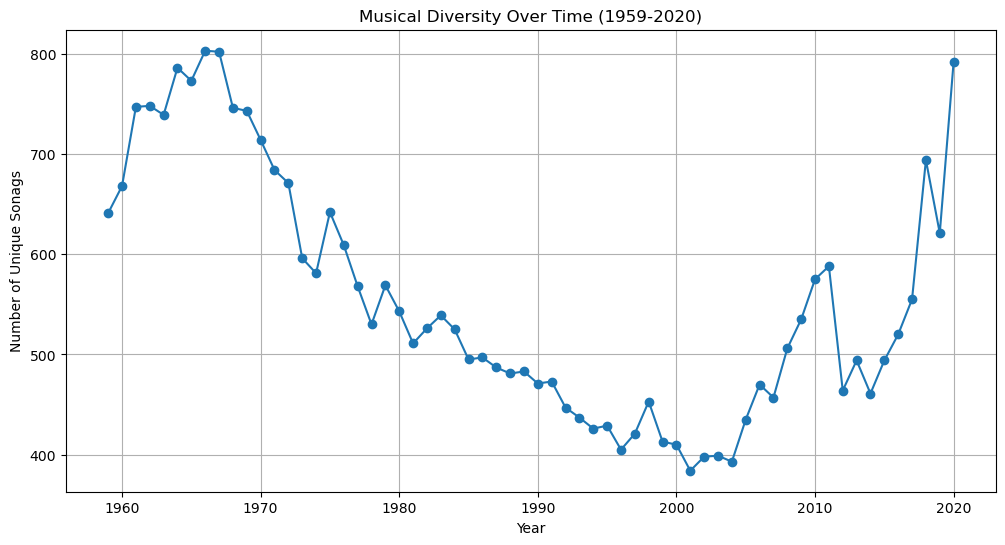

In [5]:
#(b)
#filter out 1958 & 2021
filtered_billboard= billboard[(billboard['year'] > 1958) & (billboard['year'] < 2021)]

#group by year & count unique songs
unique_songs_pyr= filtered_billboard.groupby('year')['song'].nunique().reset_index(name='unique_songs')

#plot
plt.figure(figsize=(12, 6))
plt.plot(unique_songs_pyr['year'], unique_songs_pyr['unique_songs'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Unique Sonags')
plt.title('Musical Diversity Over Time (1959-2020)')
plt.grid(True)
plt.show()

The above line plot illustrates the musical diversity on the Billboard Hot 100 chart from 1959 to 2020, measured by the number of unique songs that appeared on the chart each year. The plot reveals significant fluctuations over time, with peaks in diversity during the late 1960s and a noticeable decline during the 1980s. In recent years, diversity has surged, reaching a record high in 2020; this trend may reflect the increasing accessibility of music production and distribution platforms.

#### Artists with the most ten-week hits

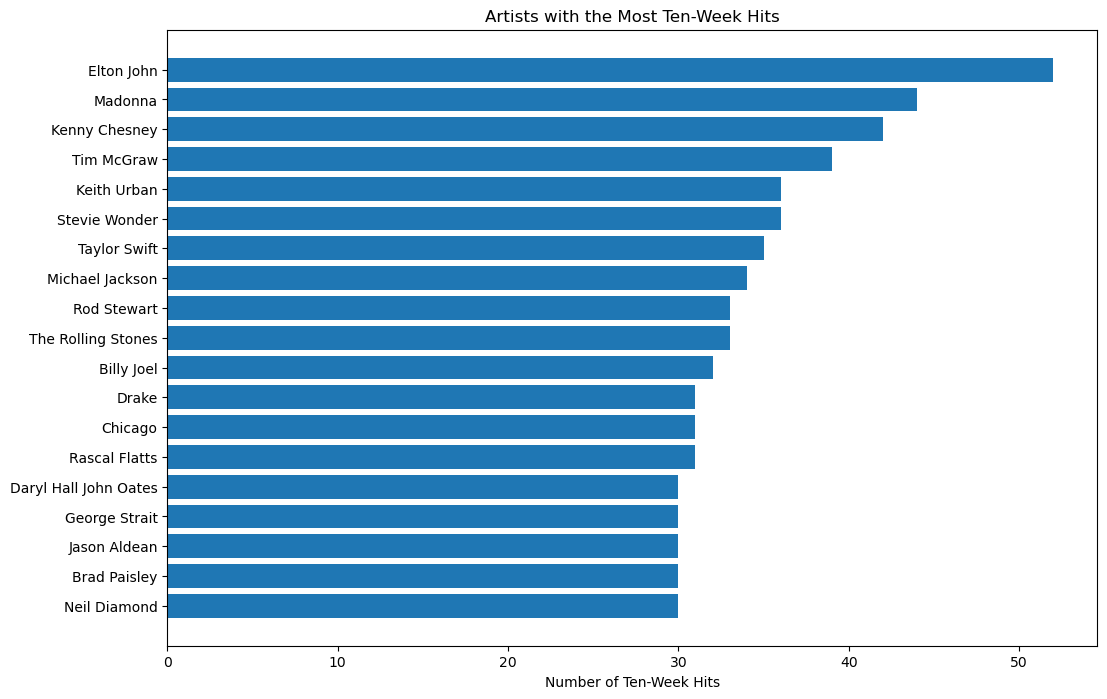

In [6]:
#(c)
#find songs where count >= 10
ten_week_hits= song_counts[song_counts['count'] >= 10]

#groupby performer & count the number of ten-week hits
artist_ten_week_hits= ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hits')

#filter artists with >= 30 ten-week hits
top_artists= artist_ten_week_hits[artist_ten_week_hits['ten_week_hits'] >= 30]

#sort by number of ten-week hits
top_artists= top_artists.sort_values(by='ten_week_hits', ascending=False)

#plot
plt.figure(figsize=(12, 8))
plt.barh(top_artists['performer'], top_artists['ten_week_hits'], color='#1f77b4')
plt.xlabel('Number of Ten-Week Hits')
plt.title('Artists with the Most Ten-Week Hits')
plt.gca().invert_yaxis()  #coord_flip() equivalent 
plt.show()

The above horizontal bar chart highlights the artists with the most ten-week hits on the Billboard Hot 100 chart. Elton John leads the list with over 50 songs that have each spent at least ten weeks on the chart, followed closely by Madonna and Kenny Chesney. It seems that these artists have consistently produced music that resonates with audiences, allowing them to maintain a strong presence on the chart over time.

### Visual storytelling pt. 1 (green buildings)

In [7]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

greenbuildings= pd.read_csv('greenbuildings.csv')
greenbuildings.head()

CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  age  \
0         379105        1  260300     2.22  38.56         91.39       14   16   
1         122151        1   67861     2.22  28.57         87.14        5   27   
2         379839        1  164848     2.22  33.31         88.94       13   36   
3          94614        1   93372     2.22  35.00         97.04       13   46   
4         379285        1  174307     2.22  40.69         96.58       16    5   

   renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0          0        1  ...             1    0          1         4988   
1          0        0  ...             0    0          1         4988   
2          1        0  ...             0    0          1         4988   
3          1        0  ...             0    0          0         4988   
4          0        1  ...             0    0          1         4988   

   hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0          58         5046          42.57   0.013700           0.029000   
1          58         5046          42.57   0.013731           0.029045   
2          58         5046          42.57   0.013731           0.029045   
3          58         5046          42.57   0.013731           0.029045   
4          58         5046          42.57   0.013731           0.029045   

   cluster_rent  
0         36.78  
1         36.78  
2         36.78  
3         36.78  
4         36.78  

[5 rows x 23 columns]

In [8]:
greenbuildings.describe()

CS_PropertyID      cluster          size      empl_gr         Rent  \
count   7.894000e+03  7894.000000  7.894000e+03  7820.000000  7894.000000   
mean    4.530025e+05   588.615024  2.346377e+05     3.206720    28.418569   
std     7.434053e+05   399.907509  2.975334e+05     8.162989    15.075483   
min     1.000000e+00     1.000000  1.624000e+03   -24.950000     2.980000   
25%     1.574520e+05   272.000000  5.089125e+04     1.740000    19.500000   
50%     3.132530e+05   476.000000  1.288380e+05     1.970000    25.160000   
75%     4.411885e+05  1044.000000  2.942120e+05     2.380000    34.180000   
max     6.208103e+06  1230.000000  3.781045e+06    67.780000   250.000000   

       leasing_rate      stories          age    renovated      class_a  ...  \
count   7894.000000  7894.000000  7894.000000  7894.000000  7894.000000  ...   
mean      82.606371    13.584495    47.243983     0.379529     0.399924  ...   
std       21.380315    12.287083    32.194393     0.485300     0.489913  ...   
min        0.000000     1.000000     0.000000     0.000000     0.000000  ...   
25%       77.850000     4.000000    23.000000     0.000000     0.000000  ...   
50%       89.530000    10.000000    34.000000     0.000000     0.000000  ...   
75%       96.440000    19.000000    79.000000     1.000000     1.000000  ...   
max      100.000000   110.000000   187.000000     1.000000     1.000000  ...   

       green_rating          net    amenities  cd_total_07   hd_total07  \
count   7894.000000  7894.000000  7894.000000  7894.000000  7894.000000   
mean       0.086775     0.034710     0.526602  1229.354193  3432.042311   
std        0.281523     0.183056     0.499323  1104.588925  1976.937255   
min        0.000000     0.000000     0.000000    39.000000     0.000000   
25%        0.000000     0.000000     0.000000   684.000000  1419.000000   
50%        0.000000     0.000000     1.000000   966.000000  2739.000000   
75%        0.000000     0.000000     1.000000  1620.000000  4796.000000   
max        1.000000     1.000000     1.000000  5240.000000  7200.000000   

       total_dd_07  Precipitation    Gas_Costs  Electricity_Costs  \
count  7894.000000    7894.000000  7894.000000        7894.000000   
mean   4661.396504      31.081312     0.011336           0.030959   
std    1984.326881      11.575219     0.002406           0.008534   
min    2103.000000      10.460000     0.009487           0.017800   
25%    2869.000000      22.710000     0.010296           0.023300   
50%    4979.000000      23.160000     0.010296           0.032737   
75%    6413.000000      43.890000     0.011816           0.037808   
max    8244.000000      58.020000     0.028914           0.062800   

       cluster_rent  
count   7894.000000  
mean      27.497285  
std       10.598952  
min        9.000000  
25%       20.000000  
50%       25.145000  
75%       34.000000  
max       71.440000  

[8 rows x 23 columns]

#### Visualize

#### Rent Distribution

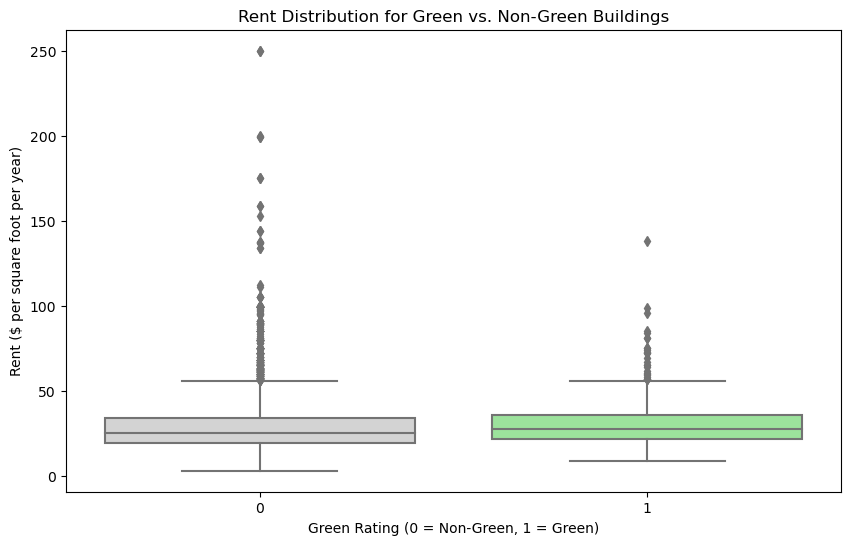

In [9]:
#plot distribution of rents for green & non-green buildings
custom_palette= {0: 'lightgrey', 1: 'lightgreen'}

plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', data=greenbuildings, palette=custom_palette)
plt.title('Rent Distribution for Green vs. Non-Green Buildings')
plt.xlabel('Green Rating (0 = Non-Green, 1 = Green)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above boxplot compares the distribution of rent prices between green-certified (LEED or EnergyStar) and non-green buildings. The median rent for green buildings is slightly higher than for non-green buildings, suggesting a potential premium for green certification. However, the overlap in interquartile ranges indicates that green certification alone does not guarantee significantly higher rents across all properties.

#### Rent vs Size

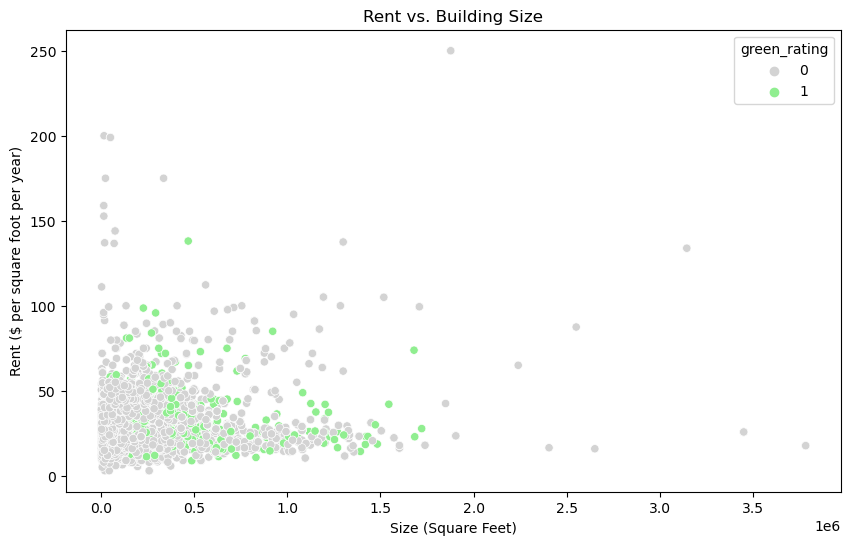

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent vs. Building Size')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above scatter plot shows the relationship between building size and rent, with green-certified buildings highlighted. There appears to be a weak positive correlation between building size and rent, with green buildings generally scattered among non-green buildings. This suggests that while building size influences rent, green certification may play a role in achieving higher rent in specific cases.

#### Rent vs Building Age

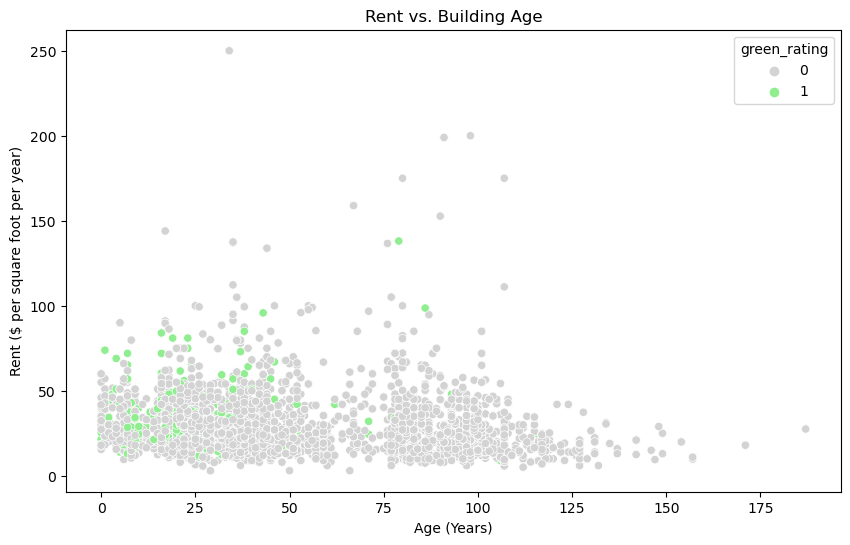

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent vs. Building Age')
plt.xlabel('Age (Years)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above scatter plot displays the relationship between building age and rent, distinguishing between green and non-green buildings. Older buildings generally have lower rents, with a slight concentration of green buildings in the lower age range. This indicates that newer buildings are more likely to be green-certified and thereby commanding higher rents.

#### Rent vs Occupancy Rate

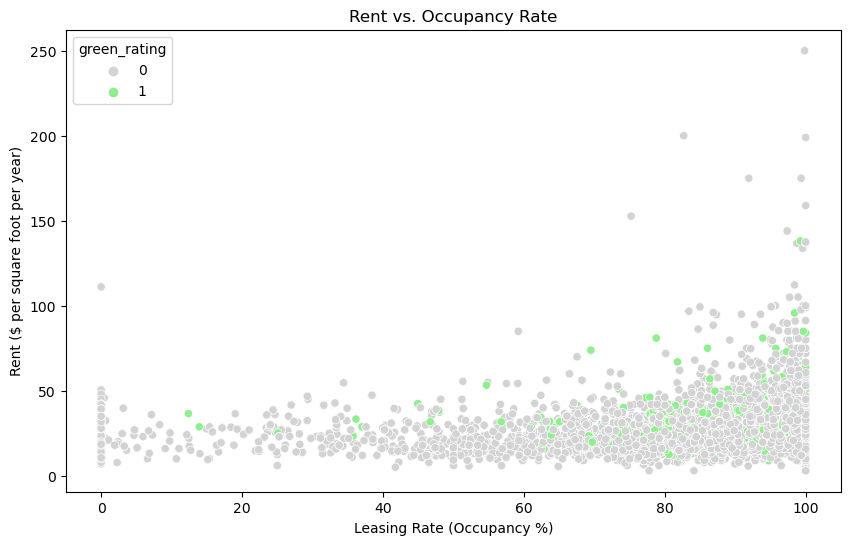

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent vs. Occupancy Rate')
plt.xlabel('Leasing Rate (Occupancy %)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above scatter plot shows the relationship between occupancy rate and rent, based on green-certified status. Higher occupancy rates generally correlate with higher rents. Green-certified buildings are distributed across various occupancy rates, suggesting that green certification might not significantly impact occupancy but could still contribute to higher rents in well-occupied buildings.

#### Confounding variables

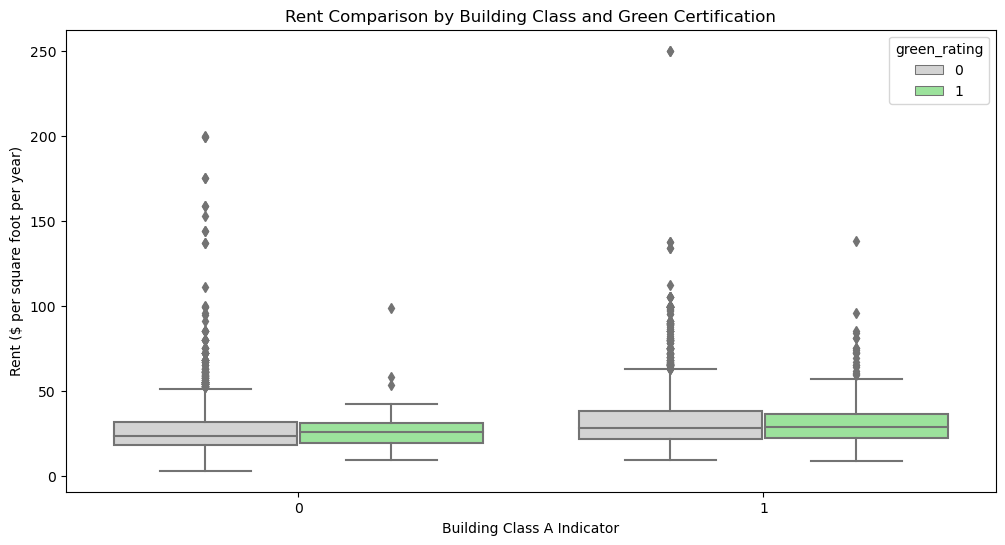

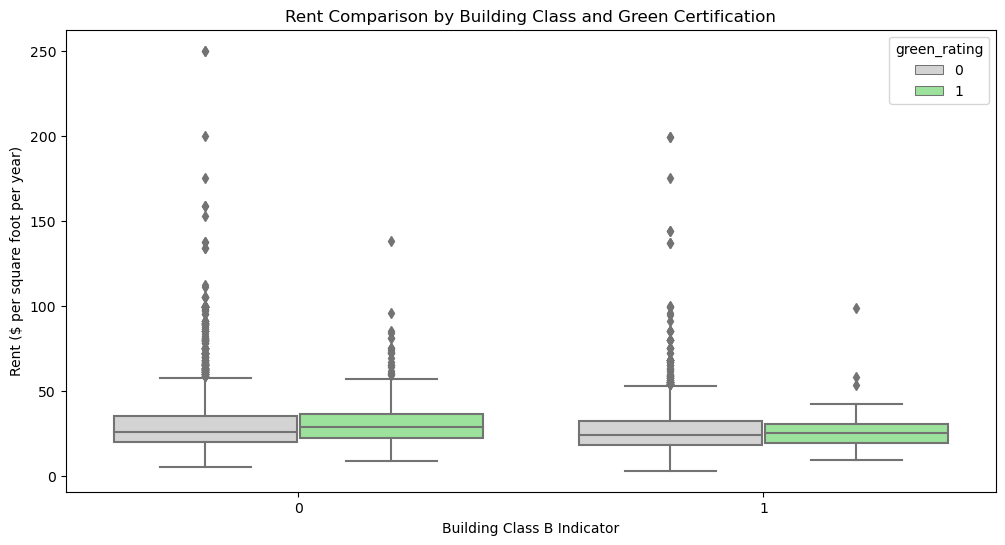

In [13]:
#plot rent differences controlling for building class (Class A, B, C)
plt.figure(figsize=(12, 6))
sns.boxplot(x='class_a', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent Comparison by Building Class and Green Certification')
plt.xlabel('Building Class A Indicator')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='class_b', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent Comparison by Building Class and Green Certification')
plt.xlabel('Building Class B Indicator')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above faceted boxplots show the rent distribution for both Class A and Class B buildings, segmented by green certification. Green-certified Class A buildings tend to have slightly higher median rents than their non-green counterparts, suggesting that green certification may enhance the value of top-tier properties. In contrast, the median rents for Class B buildings are quite similar regardless of green certification, indicating that green certification may have a less pronounced impact on rent in mid-tier properties compared to Class A.

#### Rent vs Market Rent

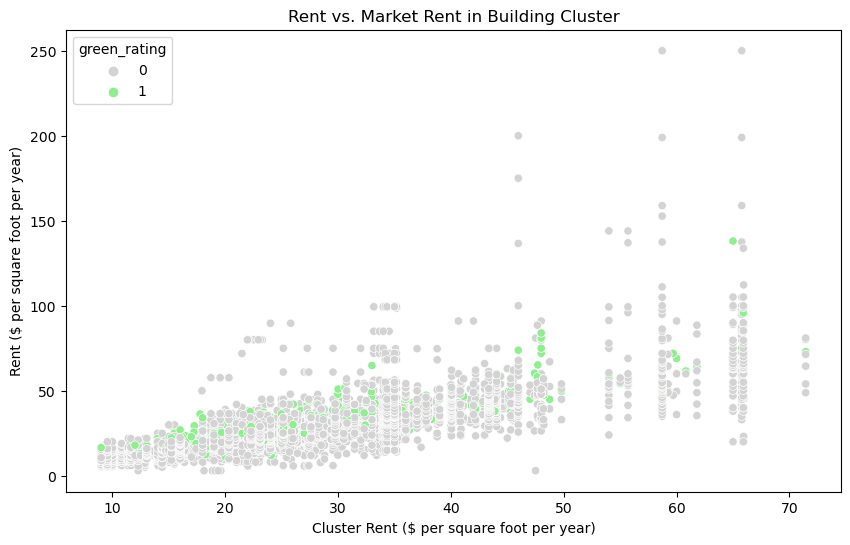

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=greenbuildings, palette=custom_palette)
plt.title('Rent vs. Market Rent in Building Cluster')
plt.xlabel('Cluster Rent ($ per square foot per year)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

The above scatter plot compares individual building rents to the average market rent in their respective clusters, distinguishing between green and non-green buildings. It seems that green-certified buildings tend to cluster around the market rent, suggesting that green certification aligns with market expectations and might help buildings achieve competitive rents in their local markets.

#### Results

The initial analysis from the on-staff stats guru correctly identifies that green-certified buildings tend to command higher rents on average compared to non-green buildings. The median rent difference of $2.60 per square foot per year between green and non-green buildings was calculated using the median, which is a robust measure less sensitive to outliers. This is a sound approach given the data's variability, particularly with outliers present in rent distributions.

However, there are some potential issues and areas for improvement:

* Confounding Variables: The initial analysis does not fully account for potential confounding variables that might influence rent, such as building age, size, location, etc. For instance, younger buildings or those in premium locations might naturally have higher rents, regardless of their green certification. The scatter plots of rent against building size, age, and occupancy rate indicate that these factors have a complex relationship with rent, which could confound the perceived premium of green certification.
* Building Class: The impact of green certification on rent may vary across different classes of buildings (Class A vs. Class B). The analysis shows that while Class A buildings see a noticeable rent premium for green certification, the effect is much smaller in Class B buildings, suggesting that the benefits of going green might be more pronounced in top-tier properties.
* Market Context: The scatter plot of rent versus market rent within building clusters highlights that green buildings often achieve higher rents, but this premium varies depending on the surrounding market conditions. A more thorough analysis would compare green and non-green buildings within the same market clusters to better isolate the effect of green certification.

#### Recommendations

* Adjust for Confounders: Conduct a more refined analysis that accounts for age, size, occupancy rate, and market context to better isolate the effect of green certification; this could involve stratifying the data by these variables or using a multivariate approach to isolate the effect of green certification.
* Market Segmentation: Focus on the building class in the decision-making process, as the benefits of green certification appear stronger in higher-class buildings.

### Visual storytelling pt. 2 (capital metro)

In [15]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

capmetro= pd.read_csv('capmetro_UT.csv')
capmetro.head()

timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   
2  2018-09-01 06:30:00         3          4         Sat        74.82   
3  2018-09-01 06:45:00         3          4         Sat        74.82   
4  2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend  
2            6   Sep  weekend  
3            6   Sep  weekend  
4            7   Sep  weekend

#### Daily Ridership Patterns

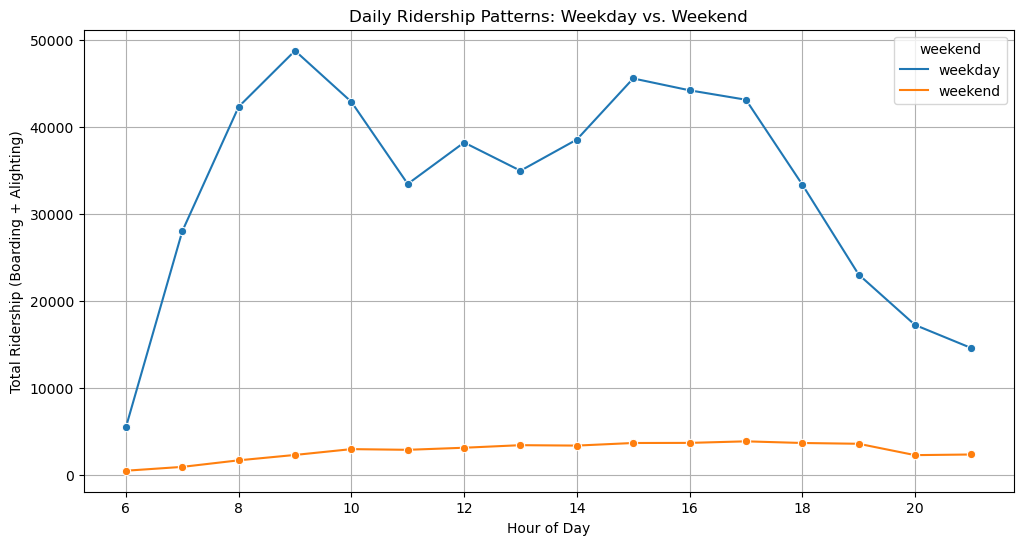

In [16]:
#sum boarding & alighting for each hour of the day & group by weekday vs weekend
hourly_ridership= capmetro.groupby(['hour_of_day', 'weekend']).agg({'boarding': 'sum', 'alighting': 'sum'}).reset_index()
hourly_ridership['total_ridership']= hourly_ridership['boarding'] + hourly_ridership['alighting']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_ridership, x='hour_of_day', y='total_ridership', hue='weekend', marker='o')
plt.title('Daily Ridership Patterns: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Ridership (Boarding + Alighting)')
plt.grid(True)
plt.show()

The above line plot shows the total ridership (boarding and alighting) throughout the day, comparing weekdays and weekends. Ridership peaks in the morning and late afternoon on weekdays, likely due to commuting patterns. Weekends have a more spread out and generally lower ridership.

#### Temperature and Ridership

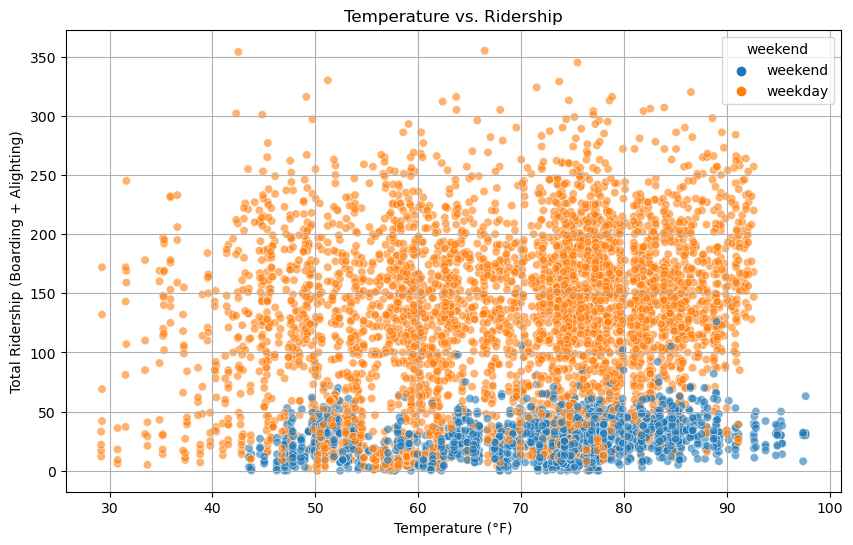

In [17]:
#scatterplot showing relationship between temperature & total ridership
capmetro['total_ridership']= capmetro['boarding'] + capmetro['alighting']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=capmetro, x='temperature', y='total_ridership', hue='weekend', alpha=0.6)
plt.title('Temperature vs. Ridership')
plt.xlabel('Temperature (°F)')
plt.ylabel('Total Ridership (Boarding + Alighting)')
plt.grid(True)
plt.show()

The above scatter plot reveals the relationship between temperature and ridership on the UT campus. There is no strong correlation, but we observe that most ridership occurs at moderate temperatures between 60°F and 80°F, with some outliers during extreme cold and warm weather during the weekday.

#### Ridership by Day of the Week

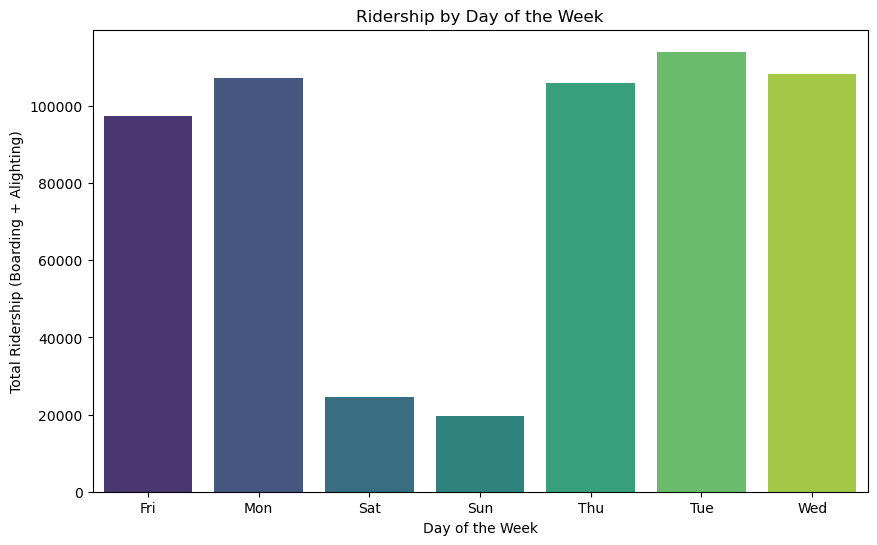

In [18]:
#group by day_of_week & calculate total ridership
daily_ridership = capmetro.groupby('day_of_week').agg({'boarding': 'sum', 'alighting': 'sum'}).reset_index()
daily_ridership['total_ridership'] = daily_ridership['boarding'] + daily_ridership['alighting']

#plot
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_ridership, x='day_of_week', y='total_ridership', palette='viridis')
plt.title('Ridership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ridership (Boarding + Alighting)')
plt.show()

The above bar plot compares total ridership across different days of the week. The highest ridership occurs on weekdays, with a noticeable drop on weekends, reflecting the typical university schedule and commuting patterns of going in Monday through Friday.

#### Monthly changes in ridership

<Figure size 1400x1600 with 0 Axes>

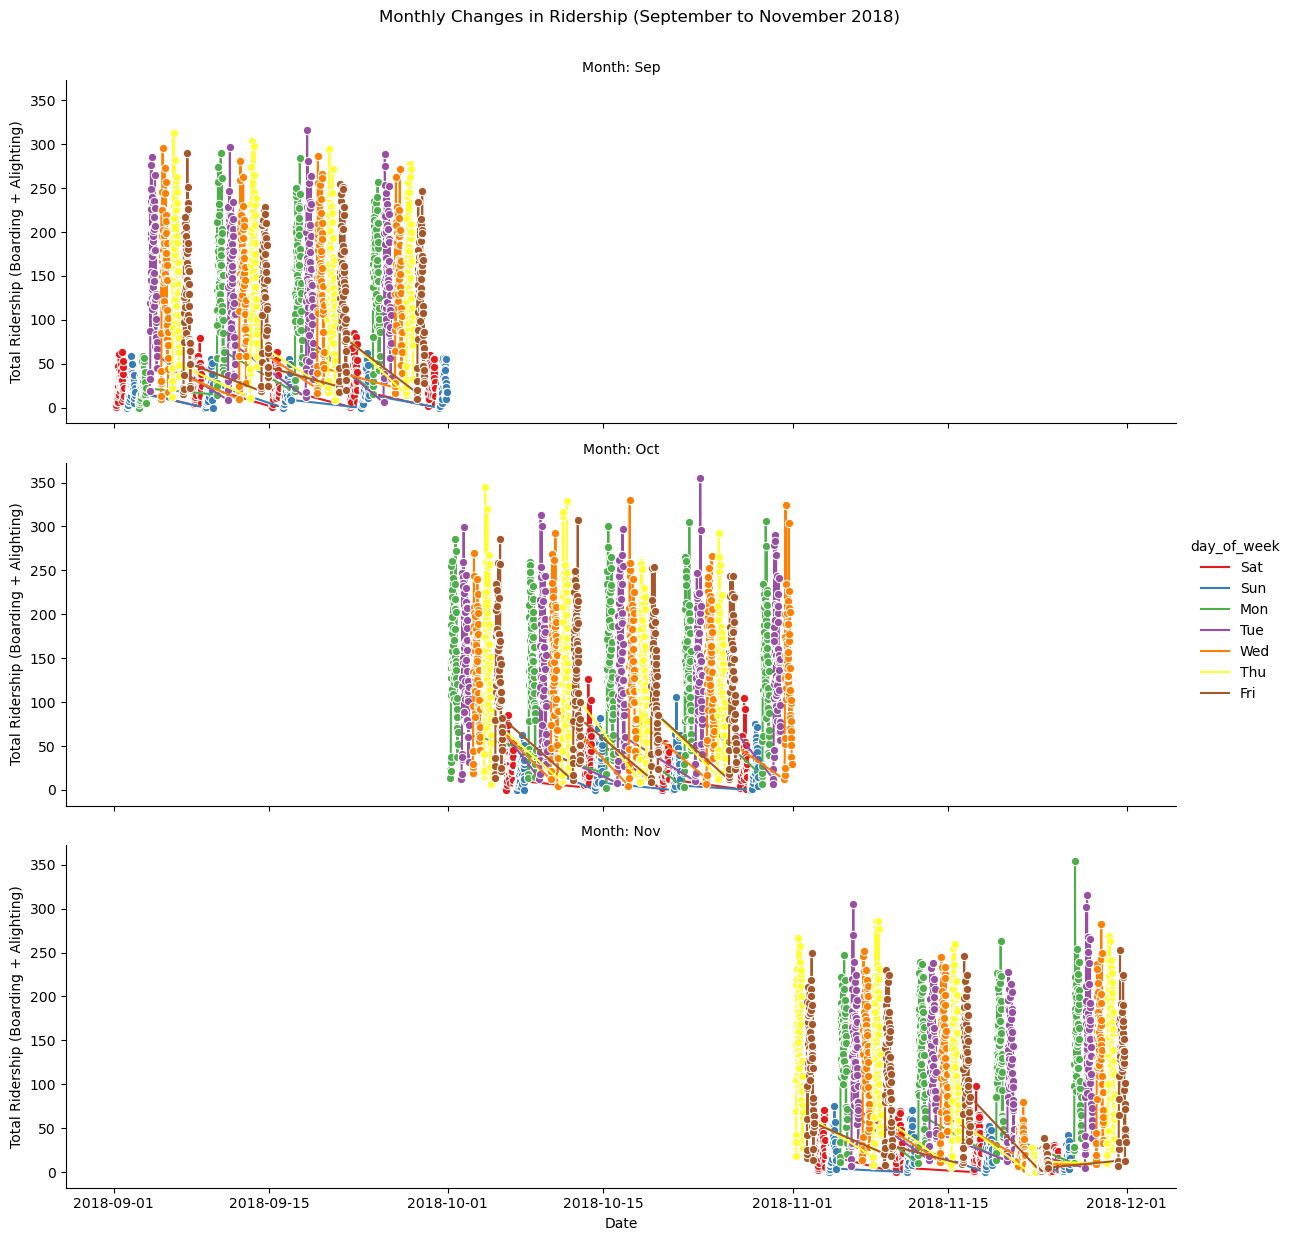

In [19]:
#convert timestamp to datetime
capmetro['timestamp']= pd.to_datetime(capmetro['timestamp'])

#calculate total ridership
capmetro['total_ridership']= capmetro['boarding'] + capmetro['alighting']

#plot showing ridership over time, faceted by month
plt.figure(figsize=(14, 16))
g = sns.relplot(
    data=capmetro, 
    x='timestamp', 
    y='total_ridership', 
    kind='line', 
    hue='day_of_week', 
    col='month', 
    col_wrap=1,
    height=4, 
    aspect=3,
    palette='Set1', 
    marker='o'
)
g.set_axis_labels('Date', 'Total Ridership (Boarding + Alighting)')
g.set_titles('Month: {col_name}')
g.fig.suptitle('Monthly Changes in Ridership (September to November 2018)', y=1.03)
plt.show()

The above faceted plots reveal consistent ridership patterns across the semester, with noticeable peaks during weekdays and lower activity on weekends, as seen before. These plots also highlight the recurring nature of ridership within each week, showing how students' commuting habits align with the academic calendar. Notably, November shows a slight drop in ridership toward the end of the month, likely due to the Thanksgiving holiday.

### Clustering and dimensionality reduction

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

wine= pd.read_csv('wine.csv')
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [21]:
#convert 'color' variable to binary (red=1, white=0)
label_encoder= LabelEncoder()
wine['color_encoded']= label_encoder.fit_transform(wine['color'])

#separate features & target variables
X= wine.drop(columns=['quality', 'color'])  # Dropping 'quality' and 'color' for unsupervised learning
y_quality= wine['quality']
y_color= wine['color_encoded']

#normalize data
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

#### PCA

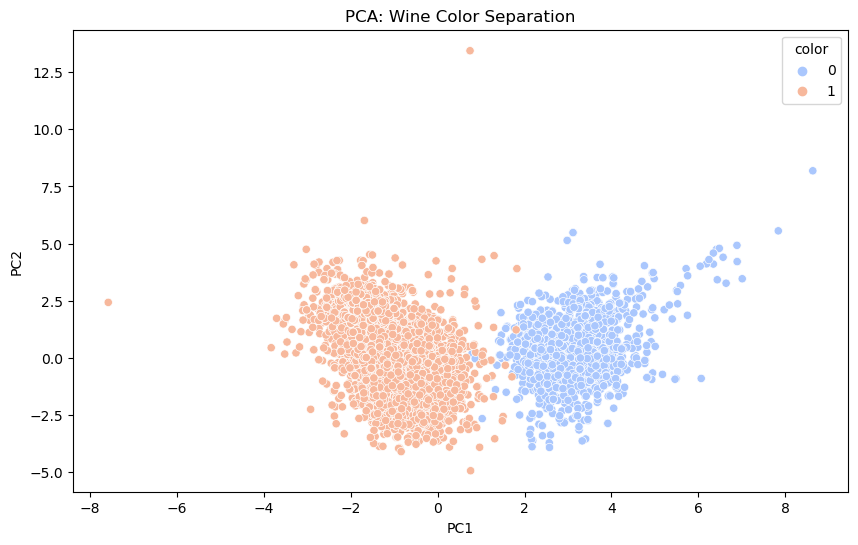

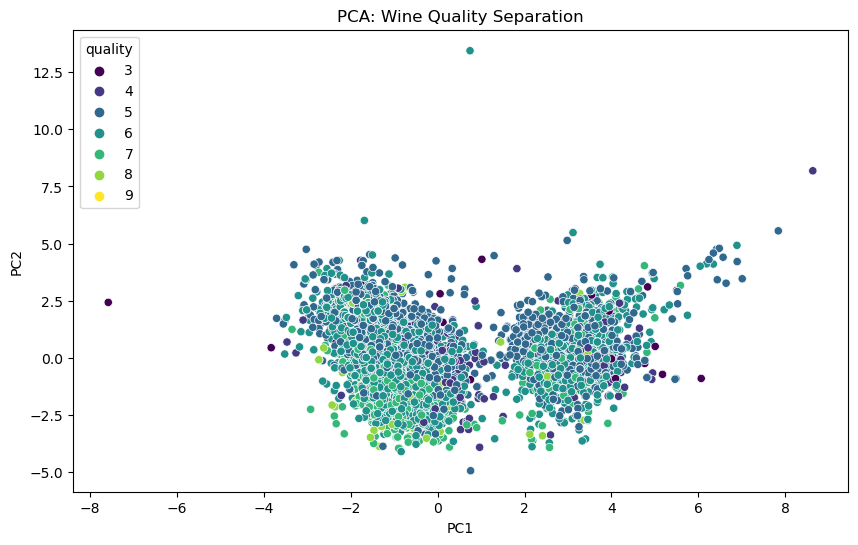

In [22]:
#PCA
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X_scaled)

#df for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['color']= y_color
pca_df['quality']= y_quality

#plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='color', data=pca_df, palette='coolwarm')
plt.title('PCA: Wine Color Separation')
plt.show()

#plot PCA results for quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=pca_df, palette='viridis')
plt.title('PCA: Wine Quality Separation')
plt.show()

The above PCA plots show two things: how the first two principal components separate the wine data based on color and the distribution of wine samples according to quality scores. 

The clear distinction between the red and white wine clusters indicates that PCA effectively captures the variance in chemical properties related to wine color.
While there's no clear separation, higher-quality wines (yellowish) tend to cluster towards one side, indicating that PCA captures some, but not all, quality-related variance.

#### t-NSE

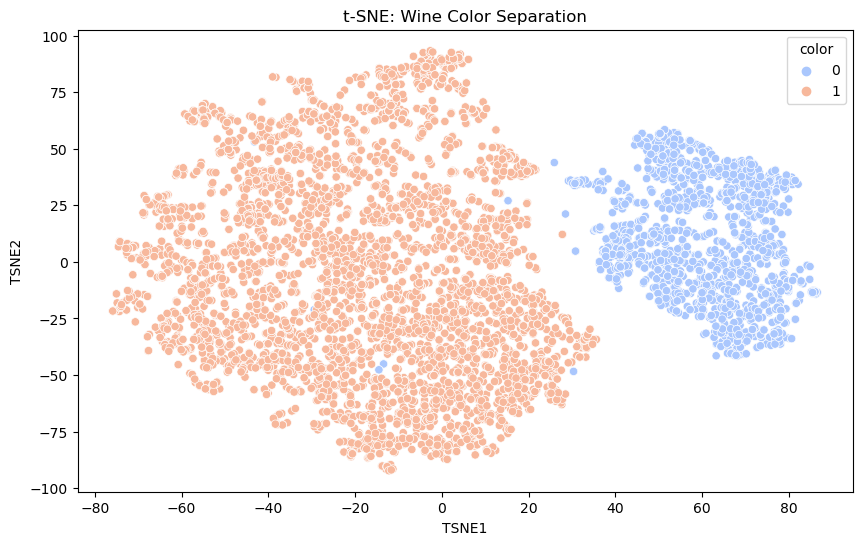

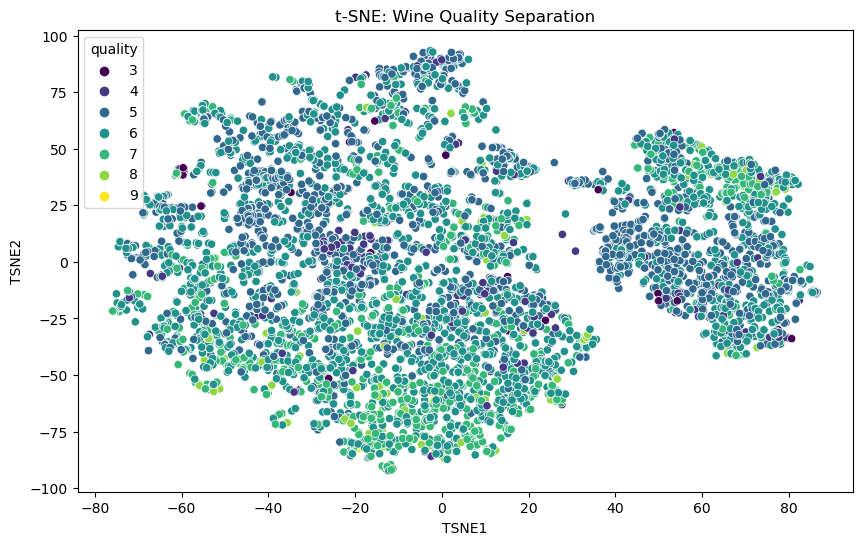

In [23]:
#t-SNE
tsne= TSNE(n_components=2, random_state=42)
X_tsne= tsne.fit_transform(X_scaled)

#df for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['color']= y_color
tsne_df['quality']= y_quality

#plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='color', data=tsne_df, palette='coolwarm')
plt.title('t-SNE: Wine Color Separation')
plt.show()

#plot t-SNE results for quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='quality', data=tsne_df, palette='viridis')
plt.title('t-SNE: Wine Quality Separation')
plt.show()

The above t-SNE plots again show the separation of the wine data based on color and the distribution of wine samples according to quality scores.

t-NSE demonstrates an even stronger separation between red and white wines than PCA, as well as more variation within clusters. The distinct clusters suggest that t-SNE is highly effective at uncovering non-linear separations in the data related to wine color. Further, although there is no perfect separation by quality, certain regions of the plot are denser with higher-quality wines, suggesting t-SNE's ability to capture complex patterns compared to PCA.

#### Clustering

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


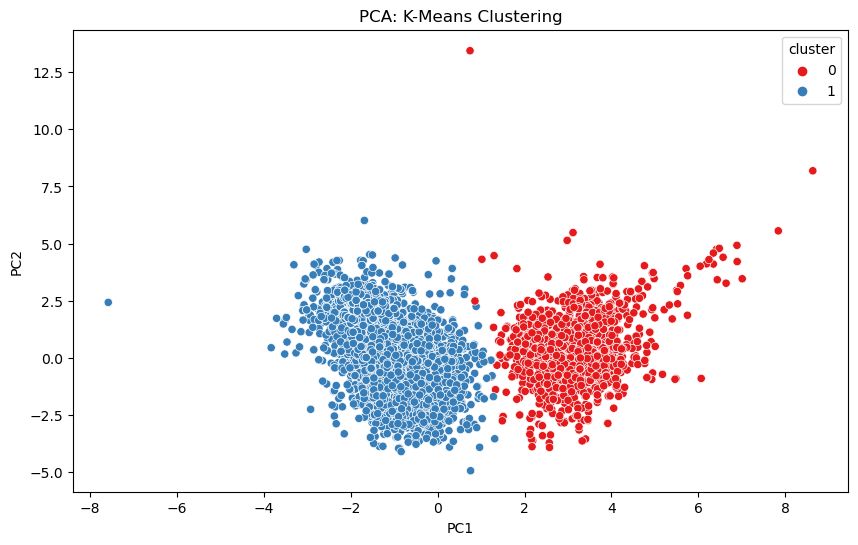

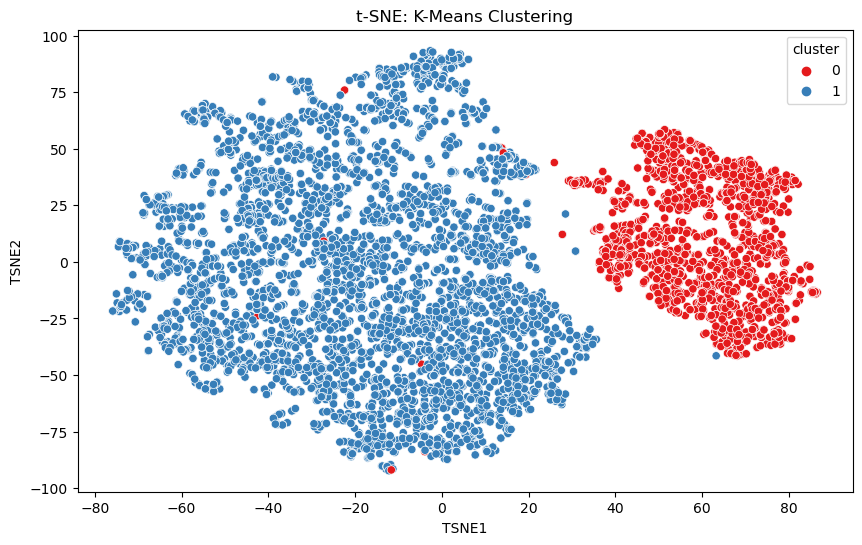

In [24]:
#k-means clustering
kmeans= KMeans(n_clusters=2, random_state=42)
clusters= kmeans.fit_predict(X_scaled)

#add cluster labels to PCA & t-SNE dfs
pca_df['cluster']= clusters
tsne_df['cluster']= clusters

#plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='Set1')
plt.title('PCA: K-Means Clustering')
plt.show()

#plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=tsne_df, palette='Set1')
plt.title('t-SNE: K-Means Clustering')
plt.show()

The above PCA plot overlays the K-Means clustering results onto the principal component space. The clusters (red and blue) align with the original color distinction, demonstrating that K-Means can differentiate between red and white wines when applied to PCA-transformed data.

In the above t-SNE plot with K-Means clustering, a strong alignment with the wine color clusters is shown. The distinct clusters indicate that K-Means effectively separates red and white wines, particularly when visualized in the t-SNE space.

#### Results

Based on the analysis, t-SNE emerges as the most effective dimensionality reduction technique for this wine dataset. The t-SNE plots show a clear and distinct separation between red and white wines, far surpassing the separation achieved through PCA. This indicates that t-SNE is highly capable of uncovering the non-linear patterns in the chemical properties that differentiate wine colors. While neither PCA nor t-SNE shows perfect separation by wine quality, t-SNE still provides a better visualization of quality-related variations, with clusters showing a tendency to group higher-quality wines together. Thus, t-SNE not only excels at distinguishing between red and white wines but also hints at underlying patterns related to wine quality, making it the preferred choice for this dataset.

### Market segmentation

In [25]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sm= pd.read_csv('social_marketing.csv')
sm.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 37 columns]

#### Wrangling & EDA

In [26]:
#drop index column
sm= sm.drop(columns=['Unnamed: 0'])

#check for null values
sm.isnull().sum()

chatter             0
current_events      0
travel              0
photo_sharing       0
uncategorized       0
tv_film             0
sports_fandom       0
politics            0
food                0
family              0
home_and_garden     0
music               0
news                0
online_gaming       0
shopping            0
health_nutrition    0
college_uni         0
sports_playing      0
cooking             0
eco                 0
computers           0
business            0
outdoors            0
crafts              0
automotive          0
art                 0
religion            0
beauty              0
parenting           0
dating              0
school              0
personal_fitness    0
fashion             0
small_business      0
spam                0
adult               0
dtype: int64

In [27]:
#summary statistics
sm.describe()

chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.160917     3.031113     1.775557     1.132562  ...   
min       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000       1.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000       2.000000     2.000000     2.000000     1.000000  ...   
max      17.000000      20.000000    37.000000    16.000000    10.000000  ...   

          religion       beauty    parenting       dating       school  \
count  7882.000000  7882.000000  7882.000000  7882.000000  7882.000000   
mean      1.095407     0.705151     0.921340     0.710860     0.767699   
std       1.914829     1.327903     1.515359     1.782347     1.188259   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max      20.000000    14.000000    14.000000    24.000000    11.000000   

       personal_fitness      fashion  small_business         spam        adult  
count       7882.000000  7882.000000     7882.000000  7882.000000  7882.000000  
mean           1.462065     0.996574        0.336336     0.006470     0.403324  
std            2.405244     1.828412        0.618147     0.083288     1.813428  
min            0.000000     0.000000        0.000000     0.000000     0.000000  
25%            0.000000     0.000000        0.000000     0.000000     0.000000  
50%            0.000000     0.000000        0.000000     0.000000     0.000000  
75%            2.000000     1.000000        1.000000     0.000000     0.000000  
max           19.000000    18.000000        6.000000     2.000000    26.000000  

[8 rows x 36 columns]

The above table presents summary statistics for each interest category across all users. It provides a general overview of how frequently each topic was discussed, with categories like 'chatter' and 'current_events' showing higher mean tweet counts, while categories like 'spam' and 'adult' have very low means, indicating they were less common among the audience.

#### Visualize

#### Distribution of Interest Categories

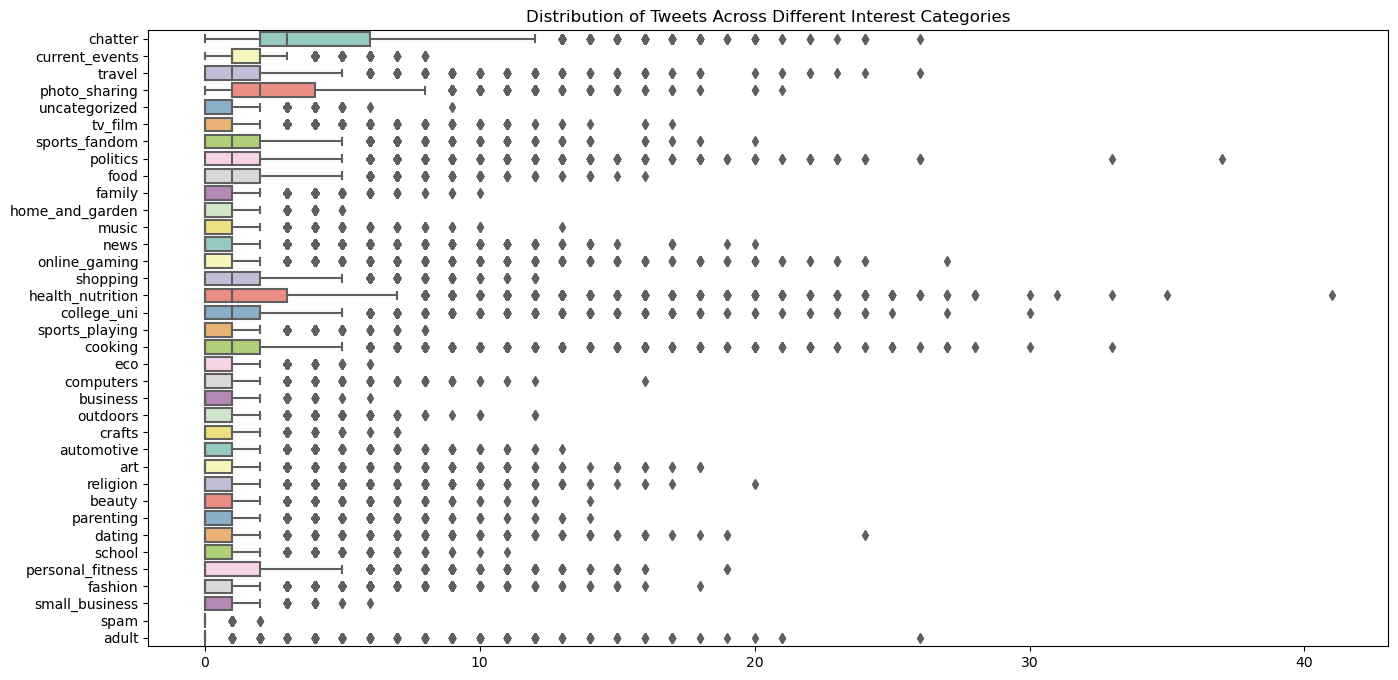

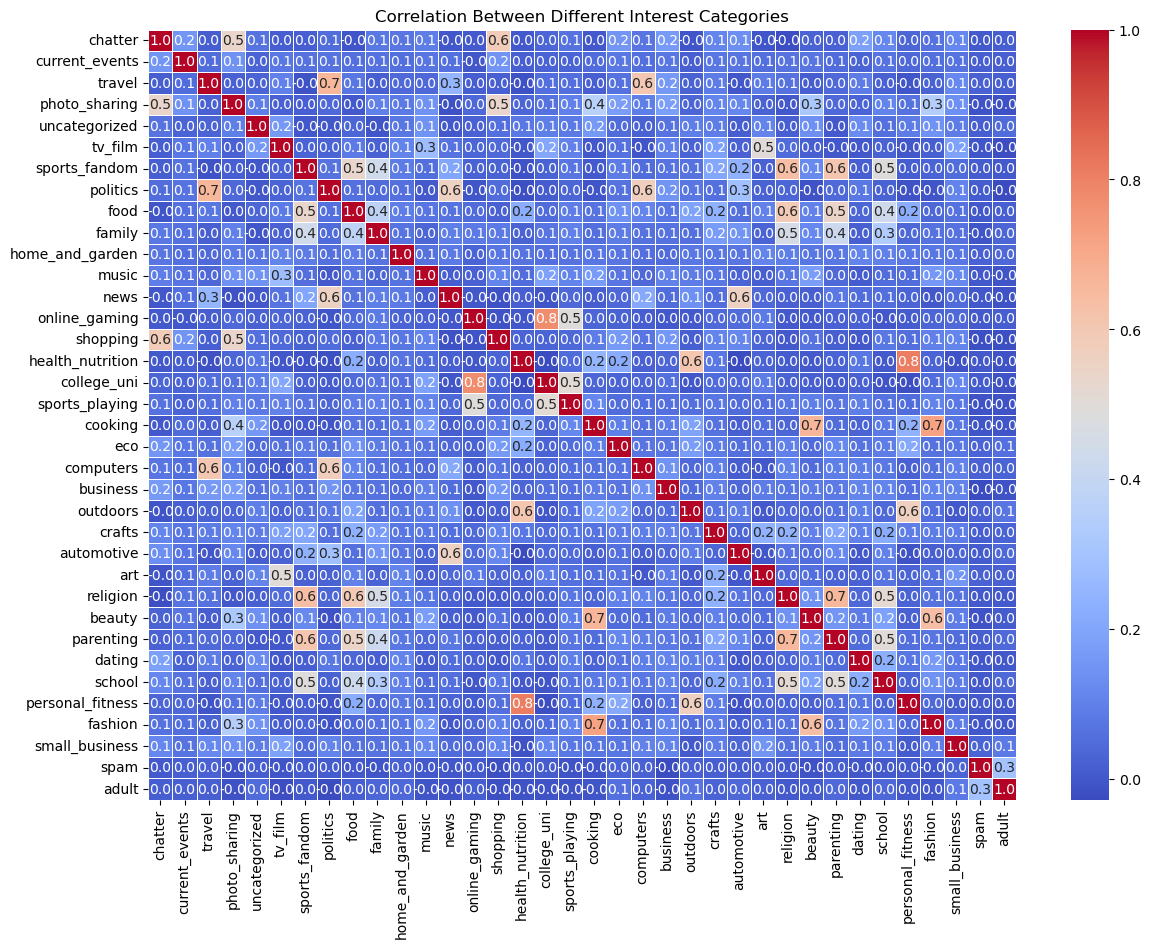

In [28]:
#plot distribution of each interest category
plt.figure(figsize=(16, 8))
sns.boxplot(data=sm, orient='h', palette='Set3')
plt.title('Distribution of Tweets Across Different Interest Categories')
plt.show()

#correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix= sm.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Different Interest Categories')
plt.show()

The above boxplot visualizes the distribution of tweets across various interest categories among NutrientH20's Twitter followers. Notable categories include 'chatter,' 'current events,' and 'health_nutrition,' which exhibit higher median tweet counts, suggesting these are popular topics within the audience.

Further, the above heatmap displays the correlation between different interest categories. Categories such as 'current events' and 'politics' show strong positive correlations, while other categories, like 'photo_sharing' and 'uncategorized,' are less correlated with others, indicating distinct content preferences within the audience.

#### K-Means Clustering

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


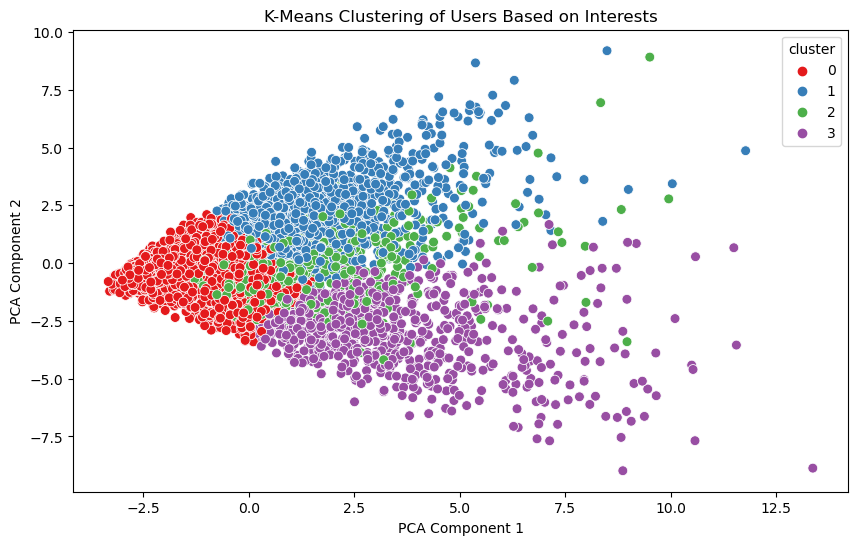

In [29]:
#exclude non-numeric columns
sm_numeric= sm.select_dtypes(include=['float64', 'int64'])

#normalize data using StandardScaler
scaler= StandardScaler()
sm_scaled= scaler.fit_transform(sm_numeric)

#perform clustering
kmeans= KMeans(n_clusters=4, random_state=42)  #experiment w/ number of clusters
sm['cluster']= kmeans.fit_predict(sm_scaled)

#visualize clusters in 2D using PCA
pca= PCA(n_components=2)
sm_pca= pca.fit_transform(sm_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sm_pca[:, 0], y=sm_pca[:, 1], hue=sm['cluster'], palette='Set1', s=50)
plt.title('K-Means Clustering of Users Based on Interests')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The above scatter plot visualizes the results of K-Means clustering applied to the interest categories of NutrientH20's Twitter followers. Four distinct clusters emerge, suggesting that the audience can be segmented into groups with similar interest profiles.

#### Insights

In [30]:
#analyze characteristics of each cluster
cluster_profiles= sm.groupby('cluster').mean()

#show cluster profiles
cluster_profiles.T  #transpose

cluster                  0         1         2         3
chatter           3.676387  6.361820  4.403361  4.111543
current_events    1.374538  1.800777  1.654062  1.670558
travel            1.065724  1.408990  5.638655  1.337224
photo_sharing     1.892709  4.910655  2.449580  2.543450
uncategorized     0.675299  1.203663  0.784314  0.747082
tv_film           0.842437  1.624861  1.158263  1.050584
sports_fandom     0.944505  1.209767  2.035014  5.954604
politics          0.957127  1.312431  8.995798  1.182879
food              0.800218  1.521088  1.463585  4.607004
family            0.558868  0.908990  0.929972  2.514916
home_and_garden   0.409140  0.713097  0.614846  0.648508
music             0.481828  1.178135  0.640056  0.726329
news              0.690316  0.975028  5.284314  1.037613
online_gaming     0.943417  1.886792  1.138655  1.271077
shopping          0.981719  2.455050  1.309524  1.402075
health_nutrition  1.516866  5.637625  2.029412  2.149157
college_uni       1.166268  2.572142  1.535014  1.456550
sports_playing    0.454407  1.026637  0.710084  0.769131
cooking           0.931447  5.071032  1.406162  1.722438
eco               0.349293  0.837958  0.591036  0.649805
computers         0.355822  0.632075  2.477591  0.743191
business          0.290968  0.639290  0.644258  0.501946
outdoors          0.490098  1.458935  1.001401  0.743191
crafts            0.326442  0.723085  0.607843  1.075227
automotive        0.545593  0.856271  2.357143  1.047990
art               0.506202  1.233629  0.677871  0.881971
religion          0.515343  0.779134  1.023810  5.357977
beauty            0.320131  1.591010  0.514006  1.106355
parenting         0.448966  0.752497  0.959384  4.095979
dating            0.429597  1.311876  1.056022  0.662776
school            0.403917  0.888457  0.724090  2.693904
personal_fitness  0.861589  3.137625  1.187675  1.378729
fashion           0.470729  2.423973  0.733894  1.037613
small_business    0.235038  0.515538  0.474790  0.392996
spam              0.005441  0.008324  0.008403  0.006485
adult             0.378672  0.522752  0.238095  0.424125

The above table shows the mean tweet counts for each interest category across the four identified clusters. Cluster 1, for example, has higher engagement in categories like 'sports_fandom' and 'current_events,' while Cluster 2 is characterized by higher involvement in 'cooking' and 'health_nutrition.'

#### Objective & Data Pre-Processing

The goal of this analysis was to identify distinct market segments within the Twitter audience of NutrientH20, a consumer brand. By understanding these segments, NutrientH20 can tailor its social media messaging more effectively to engage different groups within its audience.

The dataset provided contained categorized tweet counts for each user, spanning 36 different interest categories. Initially, the data was cleaned by dropping non-numeric columns, checking for missing values to confirm the dataset was complete. To standardize the data and remove any scale discrepancies between different categories, a StandardScaler was applied which normalized the data to have a mean of 0 and a standard deviation of 1.

#### Analysis

A boxplot was created to visualize the distribution of tweets across different categories. 
* The analysis revealed that most users posted frequently about categories like 'chatter,' 'current_events,' 'photo_sharing,' and 'health_nutrition.' Categories such as 'spam' and 'adult' had very low tweet counts, indicating these topics were less prevalent among the audience.

A heatmap was used to display the correlations between different interest categories and highlighted:
* 'health_nutrition' was moderately correlated with 'cooking' and 'sports_playing,' suggesting a group of users focused on a healthy lifestyle.
* 'photo_sharing' showed some correlation with 'travel,' indicating that users who share photos are likely to be interested in travel-related content. 
* Conversely, categories like 'chatter' and 'current_events' were highly distinct from other categories, showing minimal correlation with more specific interests.

K-Means clustering was applied to the scaled data, settling with four distinct clusters. The clusters were visualized using PCA, which reduced the dimensionality of the data to two components for easier interpretation; this plot revealed clear segmentation within NutrientH20's audience, with distinct clusters representing different combinations of interests:
* Cluster 0 (Red): Users in this cluster showed a general interest in 'chatter' and 'current_events,' again indicating a segment that engages in general conversation and keeps up with the latest news.
* Cluster 1 (Blue): This group was more inclined towards 'photo_sharing,' 'travel,' and health_nutrition,' suggesting a segment interested in visual content, exploration, and wellness.
* Cluster 2 (Green): These users were characterized by their interest in 'politics,' 'news,' and 'online_gaming,' forming a segment that is likely engaged with current affairs and digital entertainment.
* Cluster 3 (Purple): This segment showed a strong focus on 'sports_fandom' and 'food,' indicating a group of users passionate about sports and culinary experiences, which seems a bit odd.

#### Recommendations

The analysis uncovered four distinct market segments, each characterized by unique combinations of interests. These insights can inform targeted marketing strategies, allowing NutrientH20 to craft tailored messages that resonate with specific segments. For instance, content related to wellness and travel could be targeted at Cluster 1, while political and news-related content might engage users in Cluster 2. 

Additionally, NutrientH20 could integrate demographic data with interest-based clustering which would provide even more granular insights, helping NutrientH20 to not only understand what their audience talks about but also who they are. This segmentation not only helps in refining social media outreach but also enhances the brand's ability to connect with its diverse audience on a more personal level.

### Revisiting the Reuters corpus

#### Setup

In [31]:
#setup taken from the c50 jupyter notebook
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing
#helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

#reading training & test data
train_texts, train_labels = read_data_from_directory('../exercises/ReutersC50/C50train')
test_texts, test_labels = read_data_from_directory('../exercises/ReutersC50/C50test')

word_tokenize(train_texts[0])

#helper function to tokenize, remove punctuation, & stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #tokenize
    tokens = word_tokenize(text.lower())
    
    #remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    #stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jennifergonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennifergonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#more setup taken from the c50 jupyter notebook
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2564 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


#### Question

Can the documents or authors be clustered based on the textual features extracted from their articles? If so, what are the distinct groups or patterns, and how do these clusters relate to the authors or the content of the articles?

#### Approach

I used two methods:
* Method 1: a base method which performed TF-IDF, K-Means Clustering, PCA, and evaluation
* Method 2: an improvement method which performed tri-gram TF-IDF, Hierarchical Clustering, t-SNE, and evaluation

#### Method 1

#### TF-IDF

In [33]:
#pre-process text data & extract features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#vectorize training data using TF-IDF
vectorizer= TfidfVectorizer(max_features=1000, tokenizer=preprocess_text)
train_vectors= vectorizer.fit_transform(train_texts)
test_vectors= vectorizer.transform(test_texts)

print('Shape of the TF-IDF matrix for training data:', train_vectors.shape)
print('Shape of the TF-IDF matrix for test data:', test_vectors.shape)

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of the TF-IDF matrix for training data: (2500, 1000)
Shape of the TF-IDF matrix for test data: (2500, 1000)


The TF-IDF matrices for both the training and test data have a shape of (2500, 1000), indicating that each of the 2,500 documents is represented by a vector of 1,000 features. These features correspond to the most significant terms (words) across the entire corpus.

#### Clustering

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


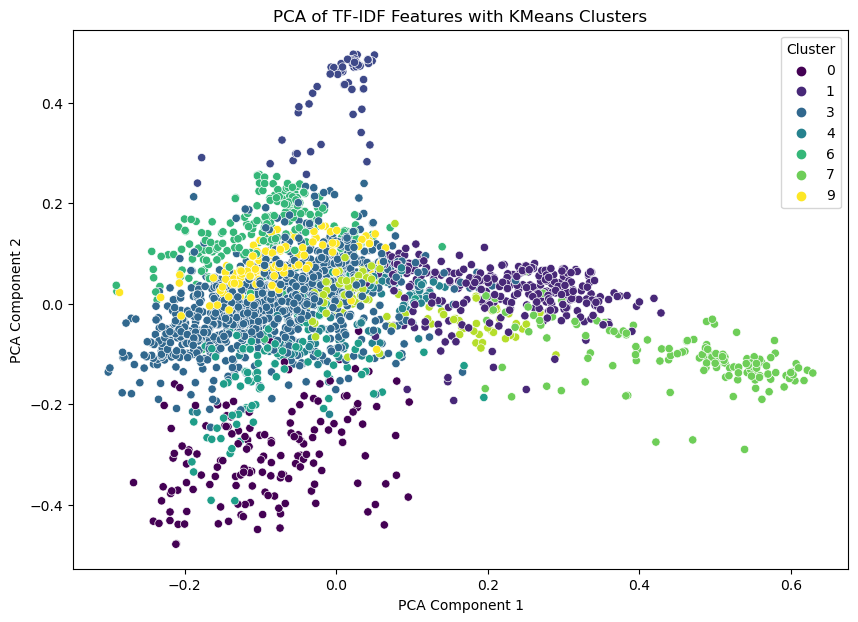

In [34]:
#k-means clustering
kmeans= KMeans(n_clusters=10, random_state=42)
train_clusters= kmeans.fit_predict(train_vectors)

#PCA
pca= PCA(n_components=2, random_state=42)
train_pca= pca.fit_transform(train_vectors.toarray())

#visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_clusters, palette='viridis')
plt.title('PCA of TF-IDF Features with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

The above plot visualizes the distribution of documents from the Reuters C50 corpus after reducing the TF-IDF features to two principal components using PCA. The K-Means algorithm has divided the documents into clusters, represented by different colors. The spread and overlap of points indicate the complexity of separating documents based on textual features alone. While some clusters show clear separation, others overlap significantly, reflecting the challenges in clustering documents where textual content may be similar across different authors.

#### Evaluate Results

In [35]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

#evaluating clustering performance
homogeneity= homogeneity_score(train_labels, train_clusters)
completeness= completeness_score(train_labels, train_clusters)
v_measure= v_measure_score(train_labels, train_clusters)

print(f"Homogeneity: {homogeneity:.2f}")
print(f"Completeness: {completeness:.2f}")
print(f"V-measure: {v_measure:.2f}")

Homogeneity: 0.34
Completeness: 0.70
V-measure: 0.46


The homogeneity score of 0.34 indicates that the clusters generated by the K-Means algorithm have a moderate level of internal consistency in terms of author identification. Simply, a score closer to 1 would imply that documents within the same cluster are predominantly written by the same author, but in this case, the lower score suggests that different authors' documents are often grouped together.

The completeness score of 0.70 reflects that a significant proportion of documents by the same author are placed in the same cluster. This higher score suggests that while the clusters may contain a mix of authors, many documents by the same author tend to be grouped together; the data is capturing some author-specific patterns.

The V-measure of 0.46 is a balanced metric that considers both homogeneity and completeness. This moderate score indicates that while the clustering captures some meaningful patterns, there is still a substantial overlap between clusters, with room for improvement in distinguishing between different authors' documents.

#### Method 2

#### Tri-gram TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorize training data using TF-IDF w/ trigrams
vectorizer= TfidfVectorizer(max_features=2000, ngram_range=(1, 3), tokenizer=preprocess_text)
train_vectors= vectorizer.fit_transform(train_texts)
test_vectors= vectorizer.transform(test_texts)

print('Shape of the TF-IDF matrix for training data:', train_vectors.shape)

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of the TF-IDF matrix for training data: (2500, 2000)


#### t-SNE

In [37]:
from sklearn.manifold import TSNE

#use t-SNE to reduce dimensionality of n-gram TF-IDF features
tsne_model= TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
train_tsne= tsne_model.fit_transform(train_vectors.toarray())

print(f'Shape of t-SNE output: {train_tsne.shape}')

Shape of t-SNE output: (2500, 2)


#### Hierarchical Clustering

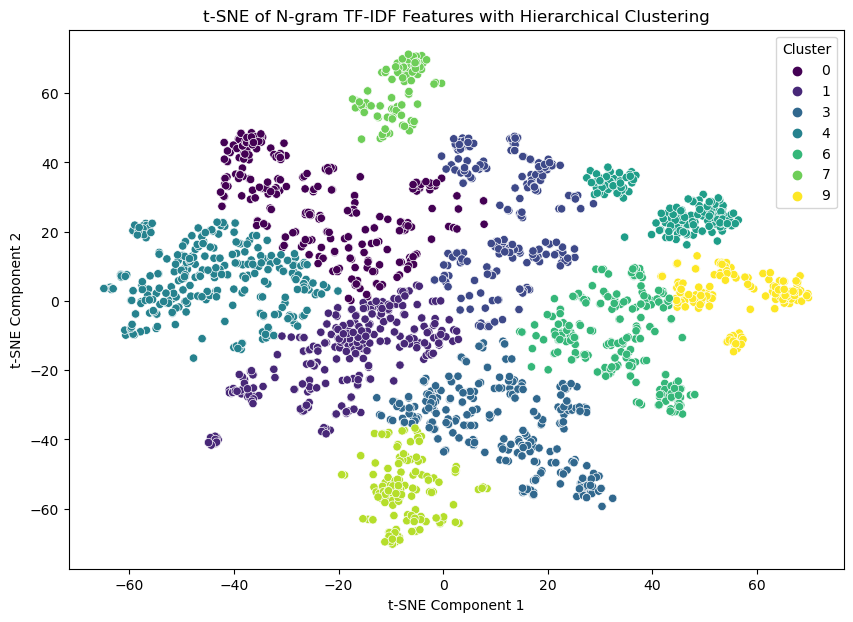

In [38]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

#apply hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=10)
train_clusters = hierarchical_cluster.fit_predict(train_tsne)

#plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=train_clusters, palette='viridis')
plt.title('t-SNE of N-gram TF-IDF Features with Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

The above plot visualizes the clustering of documents based on tri-gram TF-IDF features, reduced to two dimensions using t-SNE. Each point represents a document, colored according to its assigned cluster by hierarchical clustering. The clusters show distinct groupings with some overlap, indicating that the tri-gram features helped capture more patterns related to the documents' content, though there is still room for further separation of clusters.

#### Evaluate Results

In [39]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

#evaluating clustering performance
homogeneity= homogeneity_score(train_labels, train_clusters)
completeness= completeness_score(train_labels, train_clusters)
v_measure= v_measure_score(train_labels, train_clusters)

print(f"Homogeneity: {homogeneity:.2f}")
print(f"Completeness: {completeness:.2f}")
print(f"V-measure: {v_measure:.2f}")

Homogeneity: 0.39
Completeness: 0.68
V-measure: 0.49


Compared to the previous approach, which yielded a homogeneity of 0.34, completeness of 0.70, and a V-measure of 0.46, these results show improvement in the ability to group documents by author. The increase in homogeneity indicates better internal consistency within clusters, while the higher completeness score reflects more effective grouping of documents from the same author.

#### Conclusion

The shift to using tri-grams for feature extraction, combined with t-SNE for dimensionality reduction and hierarchical clustering, has led to improvement in how well the Reuters C50 documents are grouped by author. The higher homogeneity and V-measure scores suggest that tri-grams, which capture sequences of three words, are more effective at identifying author-specific writing patterns compared to traditional TF-IDF methods that focus on single words. This means that certain phrases or word combinations are unique enough to help distinguish one author’s work from another, resulting in clearer and more meaningful clusters.

However, while these results are promising, there is still potential to enhance the clustering accuracy further. By fine-tuning the parameters of the t-SNE algorithm, exploring different ranges of N-grams, or integrating this approach with other clustering methods, more precise and insightful groupings could be achieved. This would improve the ability to identify and interpret patterns within the data, making it easier to draw valuable conclusions about the authorship and content of the documents. Due to computational efficiency, this is not possible at the moment.

### Association rule mining

In [40]:
#setup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

with open('groceries.txt', 'r') as file:
    transactions = [line.strip().split(',') for line in file]

#use TransactionEncoder to convert the list of transactions into a one-hot encoded df
te= TransactionEncoder()
te_ary= te.fit(transactions).transform(transactions)
gr= pd.DataFrame(te_ary, columns=te.columns_)
gr.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  
3       False       False    True     False  
4       False        True   False     False  

[5 rows x 171 columns]

The above df displays the first few rows of the one-hot encoded transaction data. Each column represents a specific item, and each row corresponds to a shopping basket. A 'True' value indicates the presence of the item in the corresponding basket, while 'False' means the item was not purchased in that transaction.

#### Apriori algorithm

In [41]:
#apply Apriori algorithm w/ minimum support threshold
frequent_itemsets= apriori(gr, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

support         itemsets
0  0.033452       (UHT-milk)
1  0.017692  (baking powder)
2  0.052466           (beef)
3  0.033249        (berries)
4  0.026029      (beverages)

The above output shows the first few frequent itemsets identified by the Apriori algorithm, along with their support values. 

Support represents the proportion of transactions that contain the itemset. For instance, 'UHT-milk' appears in approximately 3.35% of all transactions. This is the foundation for generating association rules, as they indicate which items frequently appear together in shopping baskets.

#### Generate association rules

In [42]:
#generate association rules w/ 1.5 minimum confidence & lift threshold
rules= association_rules(frequent_itemsets, metric='lift', min_threshold=1.5)

#filter rules based on a 40% confidence threshold
rules= rules[(rules['confidence'] >= 0.4) & (rules['lift'] >= 1)]

rules.head()

antecedents         consequents  antecedent support  consequent support  \
5          (beef)        (whole milk)            0.052466            0.255516   
37       (butter)        (whole milk)            0.055414            0.255516   
43  (butter milk)        (whole milk)            0.027961            0.255516   
44      (chicken)  (other vegetables)            0.042908            0.193493   
48      (chicken)        (whole milk)            0.042908            0.255516   

     support  confidence      lift  leverage  conviction  zhangs_metric  
5   0.021251    0.405039  1.585180  0.007845    1.251315       0.389597  
37  0.027555    0.497248  1.946053  0.013395    1.480817       0.514659  
43  0.011591    0.414545  1.622385  0.004447    1.271634       0.394659  
44  0.017895    0.417062  2.155439  0.009593    1.383521       0.560090  
48  0.017590    0.409953  1.604411  0.006627    1.261736       0.393607

The above table displays the first few association rules generated from the frequent itemsets, along with several key metrics:

* Antecedents and Consequents: These columns list the items involved in the association rule, with the antecedent (item 1) leading to the consequent (item 2).
* Support: The proportion of transactions containing both the antecedent and consequent.
* Confidence: The likelihood that the consequent is purchased when the antecedent is present.
* Lift: A measure of the strength of the association, with values greater than 1 indicating a strong positive correlation between the antecedent and consequent.

Reasonable thresholds for lift and confidence were set to filter out less significant rules.

* Confidence Threshold: 0.5 was chosen so that the consequent occurs at least 50% of the time when the antecedent occurs.
* Lift Threshold: 1.5 was chosen to indicate that the items in the rule are 1.5 times more likely to occur together than by chance.

#### Visualize

#### Support vs Confidence with Lift

In [43]:
#convert antecedents & consequents to strings
if isinstance(rules['antecedents'].iloc[0], frozenset):
    rules['antecedents']= rules['antecedents'].apply(lambda x: ', '.join(list(x)))
if isinstance(rules['consequents'].iloc[0], frozenset):
    rules['consequents']= rules['consequents'].apply(lambda x: ', '.join(list(x)))

#interactive scatter plot
fig= px.scatter(
    rules, 
    x='support', 
    y='confidence', 
    size='lift', 
    color='lift', 
    hover_data=['antecedents', 'consequents'],
    title='Support vs Confidence with Lift as Size',
    size_max=20)

fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence')

fig.show()

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jennifergonzalez/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



The above scatter plot visualizes the relationship between support and confidence for the generated association rules, with lift represented by the size and color of the points. Each point represents an association rule, where higher support indicates more frequent occurrence in the dataset, and higher confidence indicates a stronger rule. The color and size of the points show lift value; rules with larger lift values (brighter and larger points) are more significant as they indicate a stronger association between the items beyond what would be expected by chance.

#### Bar Plot of Top 10 Rules by Lift

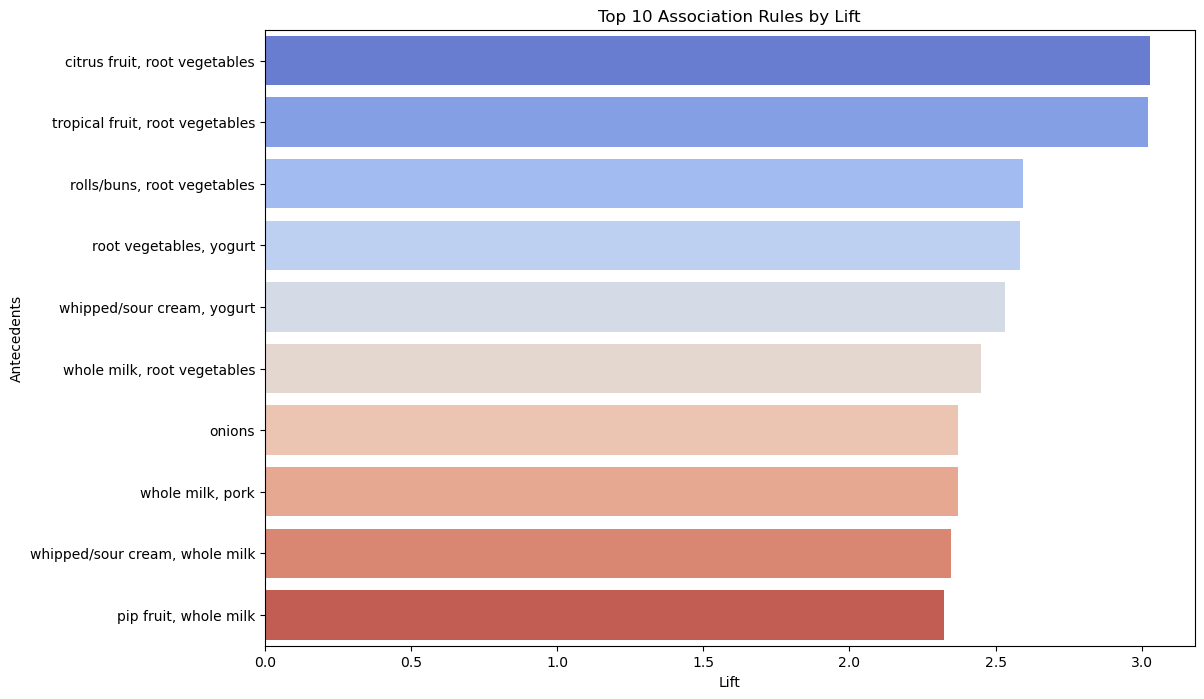

In [44]:
#sort rules by lift & plot top 10
top_rules= rules.nlargest(10, 'lift')

plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='coolwarm', orient='h')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.show()

The above bar chart ranks the top 10 association rules based on their lift values, indicating the strength of association between the antecedent and consequent items.

The strongest rule involves the combination of 'citrus fruit' and 'root vegetables,' which are likely to be purchased together. This could be because both items are staples in healthy diets and are often used together in recipes. Other notable associations include 'root vegetables' with 'tropical fruit' and 'rolls/buns.'

#### Bar Plot of next Top 10 Rules by Lift (11th-20th)

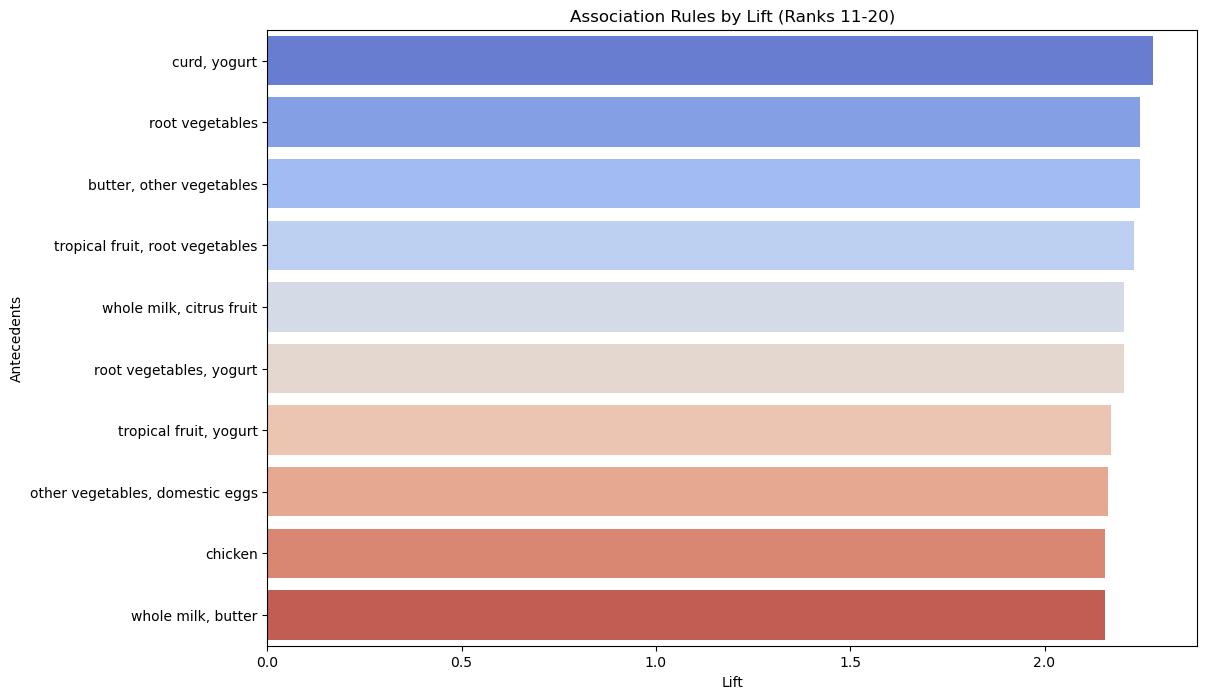

In [45]:
next_top_rules= rules.nlargest(20, 'lift').tail(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y='antecedents', data=next_top_rules, palette='coolwarm', orient='h')
plt.title('Association Rules by Lift (Ranks 11-20)')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.show()

The above bar chart shows the next set of 10 association rules ranked 11th to 20th by lift. 

The strongest rule in this group is the combination of 'yogurt' and 'curd,' both dairy products that might be used together or substituted for one another in meals. Additionally, associations such as 'butter' with 'other vegetables' and 'root vegetables' with 'tropical fruit' continue to appear, reinforcing the idea that these items are commonly purchased together. The presence of 'chicken' and 'whole milk' as associated items also points towards these items being part of meal planning for many consumers.

#### Heatmap: Antecedent vs. Consequent by Lift

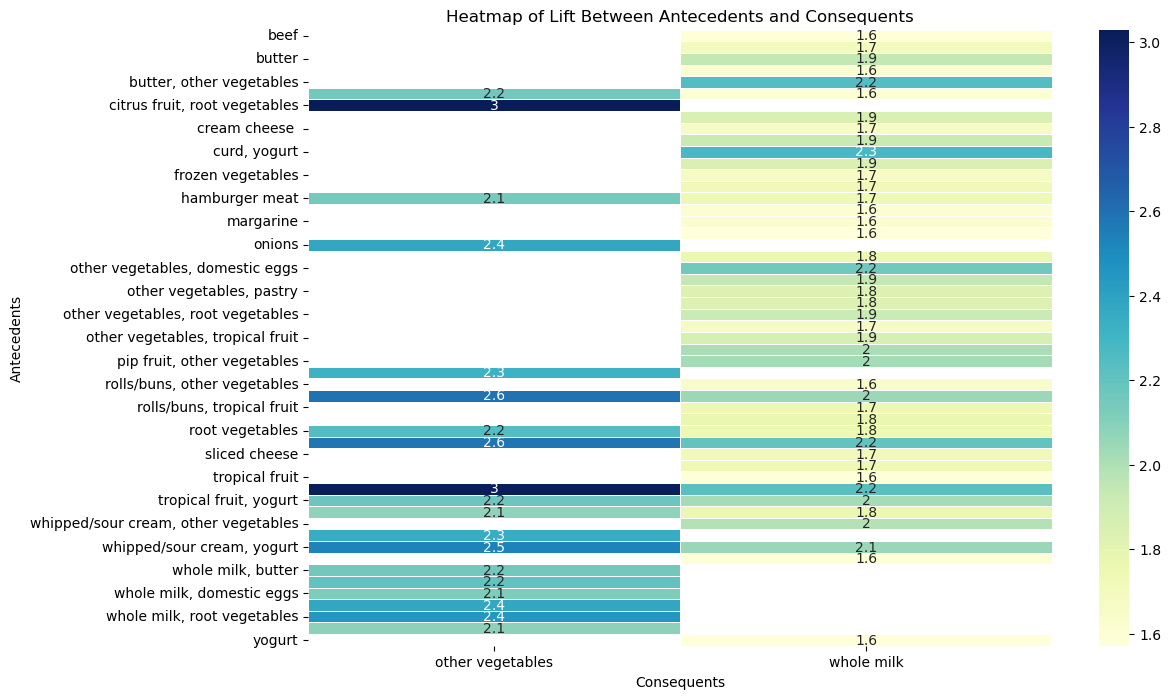

In [46]:
pivot_table= rules.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Lift Between Antecedents and Consequents')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

The above heatmap provides a visual representation of the lift values between different pairs of antecedents and consequents. Darker colors indicate stronger associations, with 'root vegetables' and 'other vegetables' consistently showing high lift when paired with a variety of other items.

For example, 'pip fruit' (which includes apples and pears) is strongly associated with 'other vegetables,' suggesting that these are commonly purchased together in health-conscious shopping trips. Similarly, 'whole milk' is frequently associated with 'butter,' 'curd,' and 'yogurt,' indicating a strong connection between dairy products in consumer purchasing patterns.

#### Results

The association rule mining analysis of grocery transaction data uncovered strong relationships between frequently purchased items. Key associations include pairs like 'citrus fruit' and 'root vegetables,' and dairy combinations such as 'whole milk' with 'butter' and 'curd.' These patterns suggest that consumers often buy these items together, either as complementary products or part of meal planning.

Future Steps
* Place associated items, such as 'citrus fruit' with 'root vegetables' or 'whole milk' with other dairy products, closer together in stores to enhance convenience and increase sales.
* Create bundled promotions for items frequently bought together, like discounts on 'yogurt' with 'curd,' to boost customer purchases.
* Use the insights to prioritize placement of highly associated items in prominent store locations to drive impulse buying.

These strategies can help retailers improve the shopping experience, optimize store layouts, and increase sales by leveraging data-driven insights.

### Image classification with neural networks

In [47]:
#setup
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#resize images & convert to pytorch tensors
transform= transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

euro= ImageFolder(root= '../exercises/EuroSAT_RGB', transform= transform)
train_size= int(.8 * len(euro))
test_size= len(euro) - train_size
train, test = random_split(euro, [train_size, test_size])

trainloader= DataLoader(train, batch_size= 32, shuffle= True)
testloader= DataLoader(test, batch_size= 32, shuffle= False)

#### Define Neural Network, Loss Function, Optimizer

In [48]:
#cnn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1= nn.Conv2d(3, 16, 3, padding=1)
        self.conv2= nn.Conv2d(16, 32, 3, padding=1)
        self.conv3= nn.Conv2d(32, 64, 3, padding=1)
        self.pool= nn.MaxPool2d(2, 2)
        self.fc1= nn.Linear(64 * 8 * 8, 512)
        self.fc2= nn.Linear(512, 128)
        self.fc3= nn.Linear(128, len(euro.classes))  #output layer matches number of classes
        self.relu= nn.ReLU()
        self.dropout= nn.Dropout(0.5)

    def forward(self, x):
        x= self.pool(self.relu(self.conv1(x)))
        x= self.pool(self.relu(self.conv2(x)))
        x= self.pool(self.relu(self.conv3(x)))
        x= x.view(-1, 64 * 8 * 8)
        x= self.relu(self.fc1(x))
        x= self.dropout(x)
        x= self.relu(self.fc2(x))
        x= self.fc3(x)
        return x

net= Net()

In [49]:
#loss function & optimizer
criterion= nn.CrossEntropyLoss()
optimizer= optim.Adam(net.parameters(), lr=0.001)

#### Train Network

In [50]:
num_epochs= 10
for epoch in range(num_epochs):
    running_loss= 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs= net(inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss= 0.0

print('Training Complete')

[Epoch 1, Batch 100] loss: 1.959
[Epoch 1, Batch 200] loss: 1.592
[Epoch 1, Batch 300] loss: 1.511
[Epoch 1, Batch 400] loss: 1.316
[Epoch 1, Batch 500] loss: 1.314
[Epoch 1, Batch 600] loss: 1.196
[Epoch 2, Batch 100] loss: 1.012
[Epoch 2, Batch 200] loss: 0.929
[Epoch 2, Batch 300] loss: 0.956
[Epoch 2, Batch 400] loss: 0.863
[Epoch 2, Batch 500] loss: 0.882
[Epoch 2, Batch 600] loss: 0.881
[Epoch 3, Batch 100] loss: 0.799
[Epoch 3, Batch 200] loss: 0.784
[Epoch 3, Batch 300] loss: 0.770
[Epoch 3, Batch 400] loss: 0.745
[Epoch 3, Batch 500] loss: 0.737
[Epoch 3, Batch 600] loss: 0.741
[Epoch 4, Batch 100] loss: 0.669
[Epoch 4, Batch 200] loss: 0.665
[Epoch 4, Batch 300] loss: 0.699
[Epoch 4, Batch 400] loss: 0.690
[Epoch 4, Batch 500] loss: 0.691
[Epoch 4, Batch 600] loss: 0.679
[Epoch 5, Batch 100] loss: 0.670
[Epoch 5, Batch 200] loss: 0.647
[Epoch 5, Batch 300] loss: 0.604
[Epoch 5, Batch 400] loss: 0.611
[Epoch 5, Batch 500] loss: 0.647
[Epoch 5, Batch 600] loss: 0.606
[Epoch 6, 

The above output displays the average loss per 100 batches during the training of a convolutional neural network over 10 epochs. 

The loss consistently decreases as the network learns, starting from 1.959 after the first 100 batches in Epoch 1, and gradually declining to 0.429 by the end of Epoch 10. This indicates the model's improving performance as it adjusts its parameters to minimize the difference between predictions and actual labels, ultimately achieving better accuracy on the task. 

The steady reduction in loss values suggests successful convergence of the model during training.

#### Evaluate on Test

In [51]:
correct= 0
total= 0
all_labels= []
all_preds= []
test_images= []
predicted_classes= []
actual_classes= []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        
        #save random images, predictions, & actual labels for display
        for i in range(4):
            index= random.randint(0, labels.size(0) - 1)
            test_images.append(images[index])
            predicted_classes.append(euro.classes[predicted[index]])
            actual_classes.append(euro.classes[labels[index]])

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 83.43%


The final accuracy achieved on the test set is 83.43%, indicating the percentage of correct predictions out of the total test samples. This accuracy reflects the model's ability to generalize and accurately classify unseen satellite images based on its training.

#### Example Images

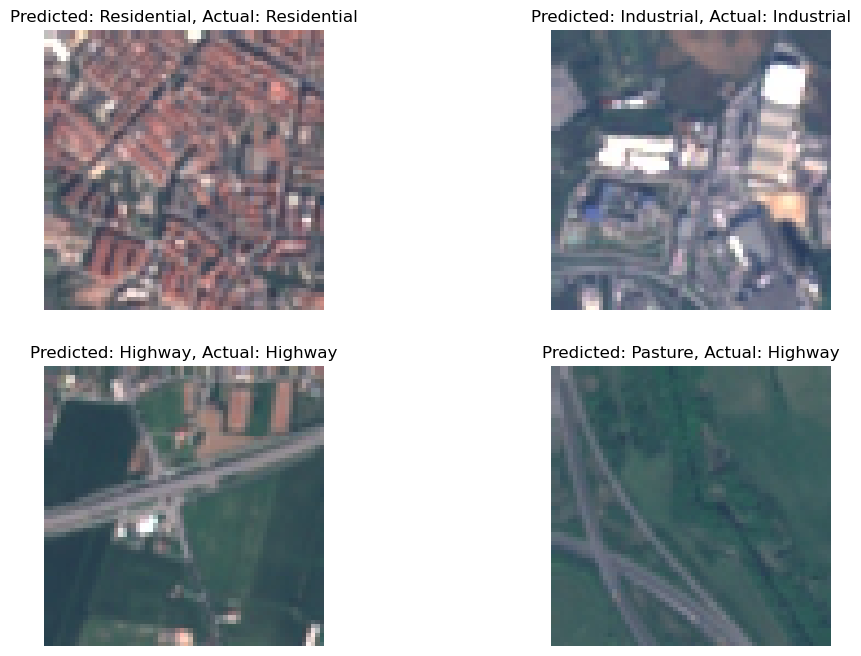

In [52]:
#images w/ predicted & actual classes
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(test_images[i].permute(1, 2, 0).numpy())
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}')
    plt.axis('off')
plt.show()

The above set of test images displays the neural network's performance in classifying satellite imagery into land use categories.

The model correctly identified three out of four images: a residential area, an industrial area, and a highway. However, it misclassified the fourth image, labeling a highway as 'pasture.' This misclassification highlights the challenges the model faces in distinguishing between visually similar land types in satellite images, indicating areas where further refinement may be needed to improve accuracy.

#### Confusion Matrix

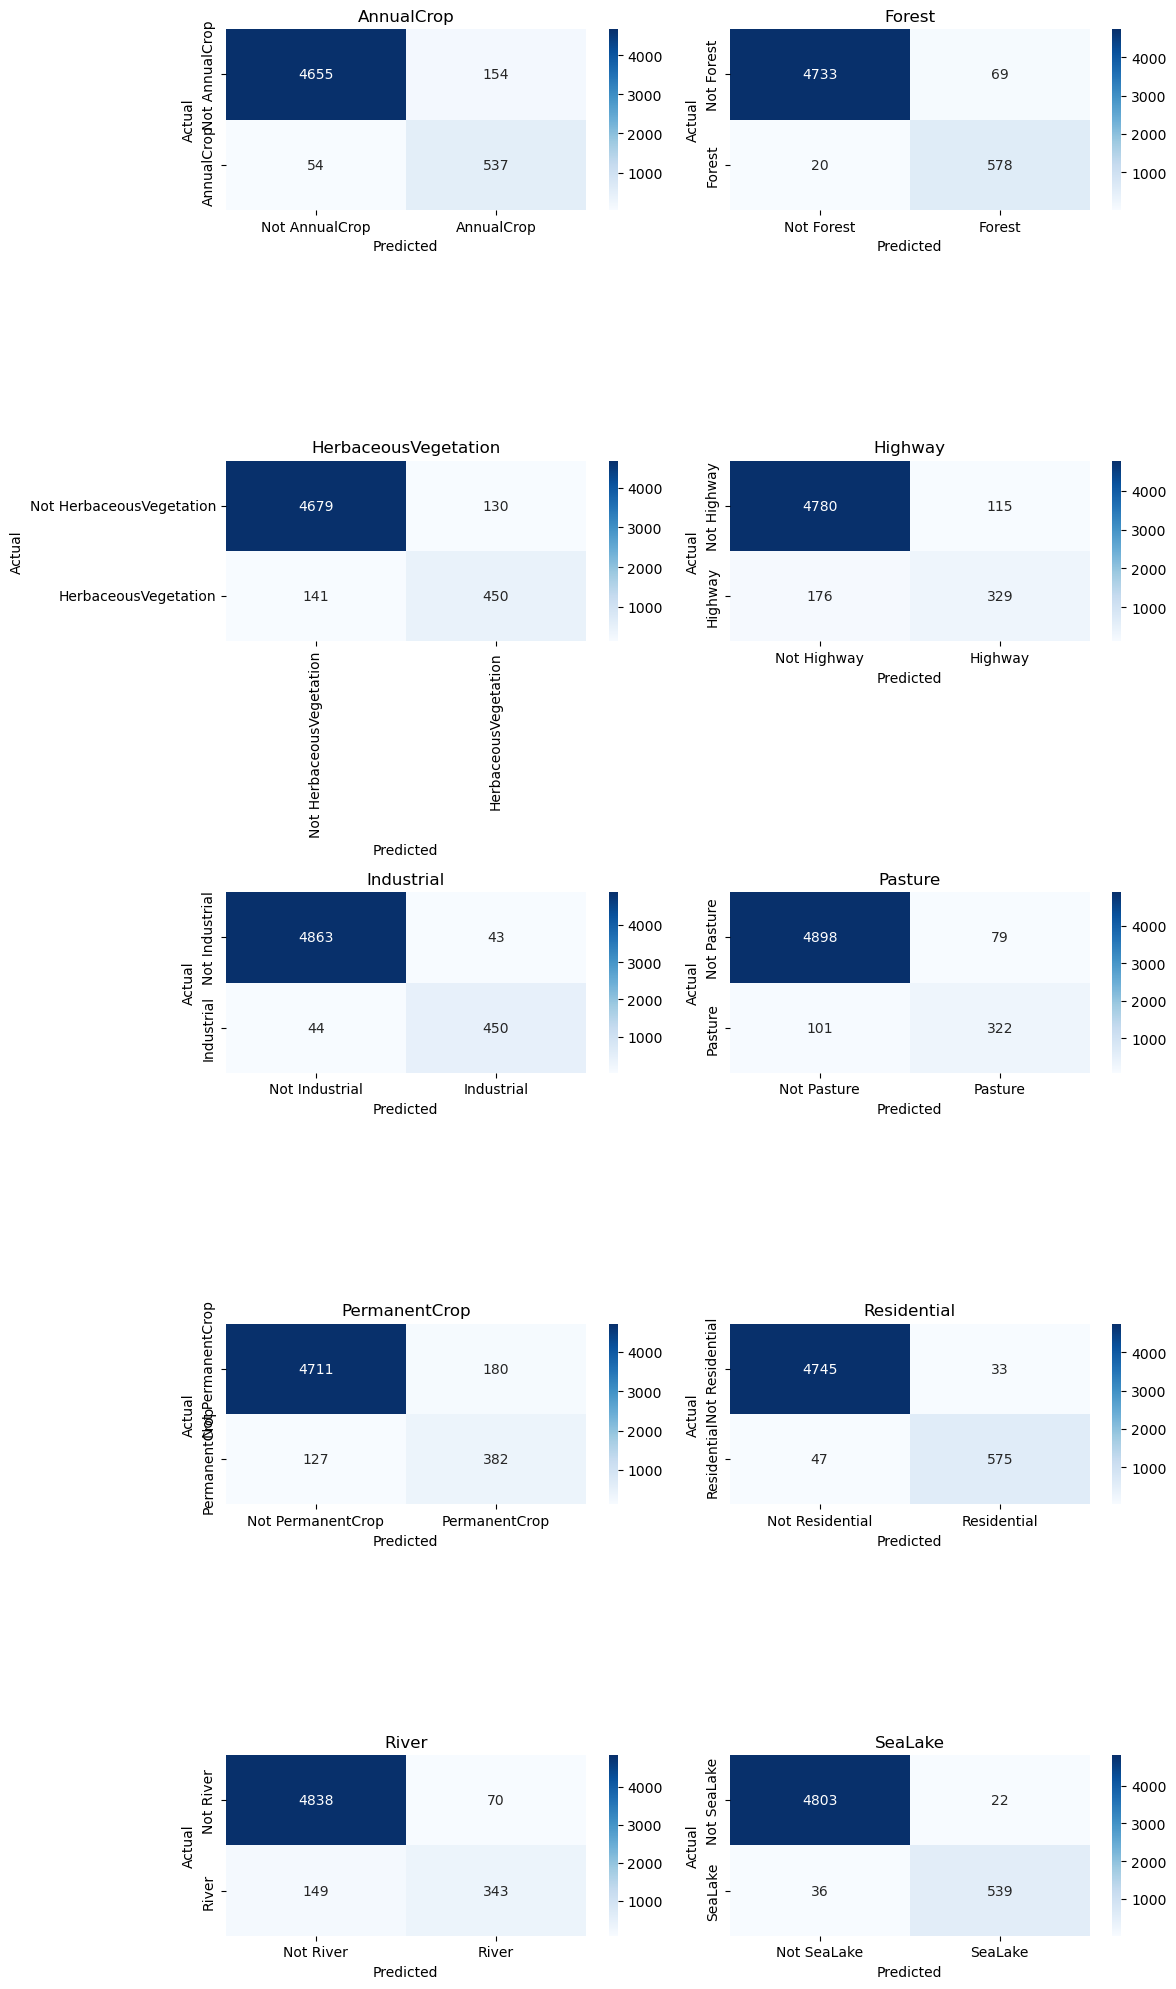

In [53]:
#full confusion matrix
cm= confusion_matrix(all_labels, all_preds)

#subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes= axes.flatten()

#loop through each class to generate a 2x2 confusion matrix
for i, class_name in enumerate(euro.classes):
    tp= cm[i, i]  #true positives
    fp= cm[:, i].sum() - tp  #false positives
    fn= cm[i, :].sum() - tp  #false negatives
    tn= cm.sum() - (tp + fp + fn)  #true negatives

    cm_2x2= np.array([[tn, fp],
                       [fn, tp]])

    #plot
    sns.heatmap(cm_2x2, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Not {class_name}', class_name],
                yticklabels=[f'Not {class_name}', class_name],
                ax=axes[i])

    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'{class_name}')

plt.tight_layout()
plt.show()

These above confusion matrices show the neural network's classification performance on individual land use categories.

Overall, the model demonstrates strong classification ability, with true positives significantly outnumbering false positives and false negatives for most classes, as seen in categories like 'Forest,' 'Industrial,' and 'Residential,' where the correct classifications vastly outweigh the errors.

However, certain classes such as 'Highway' and 'Pasture' exhibit notable false positives and false negatives, indicating the model's challenge in distinguishing these categories from others. For instance, the 'Highway' class has a relatively high number of false negatives (176), where highways were mistaken for other categories.

Despite this, the model consistently achieves high accuracy across most categories, with only a small number of misclassifications, which suggests it performs well enough in distinguishing between varied land use types.